# IBM HR Analytics Employee Attrition & Performance
### Predict attrition of your valuable employees
##### DATASET of pavansubhash
###### Kaggle Link: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

#### Project by: Angelin, Pratham, Krishna DS2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

ModuleNotFoundError: No module named 'pandas'

### Part 1: Data Cleaning <br>
Angelin:

In [3]:
employee= pd.read_csv('../IBM_HR.csv')
employee.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are 26 columns with integer variables and 9 with categorical variables. <br>
However some of the variables classified as integer, we decide would be better to take as categorical. <br>
For example, RelationshipSatisfaction has integer values but these values (1,2,3,4) refers to a certain category.

In [5]:
employee.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

There are no missing values.

In [6]:
employee["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

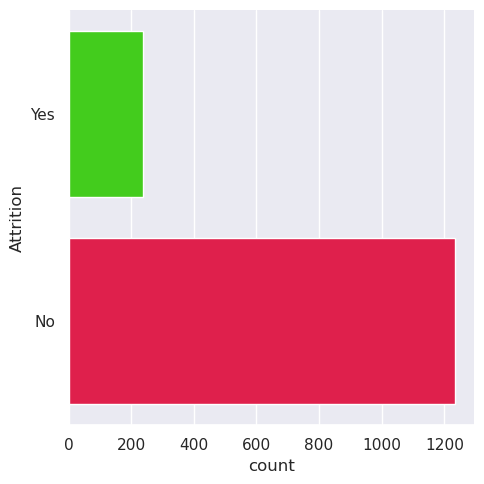

In [7]:
sb.catplot(y="Attrition", data=employee, kind="count", palette= "prism")

The dataset is **imbalanced**, hence we need to balance it before we do our decision tree.

In [8]:
employee["StandardHours"].nunique()

1

In [9]:
employee["EmployeeCount"].nunique()

1

As we have found that all employees have the same StandardHours and EmployeeCount, we decided to drop these columns. <br>
All employees are working full-time and they have a standard hour of 80 and employee count of 1.

##### What does 80 standard hours mean?
According to https://careertrend.com/13374913/pros-cons-of-a-980-work-schedule, <br>
it is also called a 9/80 work schedule. Here, employees work for 80 hours over a period of 9 days. <br>
Different companies may schedule working days differently, however most commonly employees will work four 9h days each week with an alternating 8h Friday and free Friday. <br>

##### What does employee count of 1 mean?
Employee count is also known as headcount. It is the number of employees working in the company, where each employee is counted as 1. 

In [10]:
employee.drop(columns=["StandardHours"], inplace=True)

In [11]:
employee.drop(columns=["EmployeeCount"], inplace=True)

In [12]:
employee["Over18"].nunique()

1

In [13]:
eighteen= employee.loc[employee["Age"]==18]
print(eighteen.shape)

(8, 33)


According to the column Over18, everyone is over 18 years old. <br>
However, after we tried to confirm this with the Age column, we found that there are **8 employees who are exactly 18** years old. <br>
Therefore, the column Over18 represents whether employees are *more than or equal* to 18 years old. <br>
We decided to **change** this column, so that it is strictly Over18. <br>
We changed all the employees who are aged 18 to have a record of "N" in their Over18 column.

In [14]:
for var in [296, 301, 457, 727, 828, 972, 1153, 1311]:
    employee.at[var, "Over18"]= "N"

In [15]:
employee["Over18"].value_counts()

Y    1462
N       8
Name: Over18, dtype: int64

#### Numeric Variables as a dataframe

In [16]:
num_data=pd.DataFrame(employee.select_dtypes(include=['int64']))
num_data.head()

Age  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0   41       1102                 1          2               1   
1   49        279                 8          1               2   
2   37       1373                 2          2               4   
3   33       1392                 3          4               5   
4   27        591                 2          1               7   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   
2                        4          92               2         1   
3                        4          56               3         1   
4                        1          40               3         1   

   JobSatisfaction  ...  PerformanceRating  RelationshipSatisfaction  \
0                4  ...                  3                         1   
1                2  ...                  4                         4   
2                3  ...                  3                         2   
3                3  ...                  3                         3   
4                2  ...                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2  

[5 rows x 24 columns]

In [17]:
num_data=num_data.drop(columns=["StockOptionLevel","JobInvolvement","EnvironmentSatisfaction", "Education","JobLevel","JobSatisfaction","PerformanceRating","RelationshipSatisfaction", "WorkLifeBalance","EmployeeNumber"])

Above are the variables classified as numerical but we thought would be better to treat as categorical.

In [18]:
num_data.shape

(1470, 14)

#### Categorical Variables as a dataframe

In [19]:
categorical= employee.select_dtypes(include= "object")
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       1470 non-null   object
 1   BusinessTravel  1470 non-null   object
 2   Department      1470 non-null   object
 3   EducationField  1470 non-null   object
 4   Gender          1470 non-null   object
 5   JobRole         1470 non-null   object
 6   MaritalStatus   1470 non-null   object
 7   Over18          1470 non-null   object
 8   OverTime        1470 non-null   object
dtypes: object(9)
memory usage: 103.5+ KB


These are the numeric variables we have changed to categorical:
1. Education
2. Environmental Satisfaction
3. Job Involvement
4. Job Satisfaction
5. Performance Rating
6. Relationship Satisfaction
7. Work Life Balance
8. Job Level
9. Stock Option Level

<br>
The author has made the following representation for each of these columns:

**Education** <br>
1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

**EnvironmentSatisfaction** <br>
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**JobInvolvement** <br>
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**JobSatisfaction** <br>
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**PerformanceRating** <br>
1. 'Low'
2. 'Good'
3. 'Excellent'
4. 'Outstanding'

**RelationshipSatisfaction** <br>
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**WorkLifeBalance** <br>
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'

**Job level** was not explained by the author, so we assumed that the higher the number, the higher the job level

In [20]:
int_to_cat= employee[['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'JobLevel', 'StockOptionLevel']]

In [21]:
frames= [categorical, int_to_cat]

In [22]:
categorical= pd.concat(frames, axis=1)
categorical.head()

Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences  Female   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   
2       Yes      Travel_Rarely  Research & Development          Other    Male   
3        No  Travel_Frequently  Research & Development  Life Sciences  Female   
4        No      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus Over18 OverTime  Education  \
0        Sales Executive        Single      Y      Yes          2   
1     Research Scientist       Married      Y       No          1   
2  Laboratory Technician        Single      Y      Yes          2   
3     Research Scientist       Married      Y      Yes          4   
4  Laboratory Technician       Married      Y       No          1   

   EnvironmentSatisfaction  JobInvolvement  JobSatisfaction  \
0                        2               3                4   
1                        3               2                2   
2                        4               2                3   
3                        4               3                3   
4                        1               3                2   

   PerformanceRating  RelationshipSatisfaction  WorkLifeBalance  JobLevel  \
0                  3                         1                1         2   
1                  4                         4                3         2   
2                  3                         2                3         1   
3                  3                         3                3         1   
4                  3                         4                3         1   

   StockOptionLevel  
0                 0  
1                 1  
2                 0  
3                 0  
4                 1

In [23]:
categorical.shape

(1470, 18)

In [24]:
cat_2= categorical[["Attrition", "Department", "Education", "EducationField", "JobRole", "JobSatisfaction", "MaritalStatus", "Over18", "RelationshipSatisfaction"]]
cat_2.shape

(1470, 9)

## 1. Attrition
##### What does it mean?
Attrition is the gradual reduction of a workforce as employees leave or retire. <br>
Most employers want a low attrition rate because it means that employees are satisfied and they don't have to train new people.
<br> 
Employee attrition is a situation that occurs when there is a reduction in the number of staff members over time, owing to certain unavoidable reasons. Employees may resign from work due to retirement or other personal reasons. <br>

Source: <br>
https://talenx.io/2020/06/18/what-is-employee-attrition/ <br>
and <br>
https://www.betterteam.com/what-is-attrition#:~:text=Attrition%20is%20the%20gradual%20reduction%20of%20a%20workforce,and%20they%20don%27t%20have%20to%20train%20new%20people.

<AxesSubplot: xlabel='Attrition', ylabel='Age'>

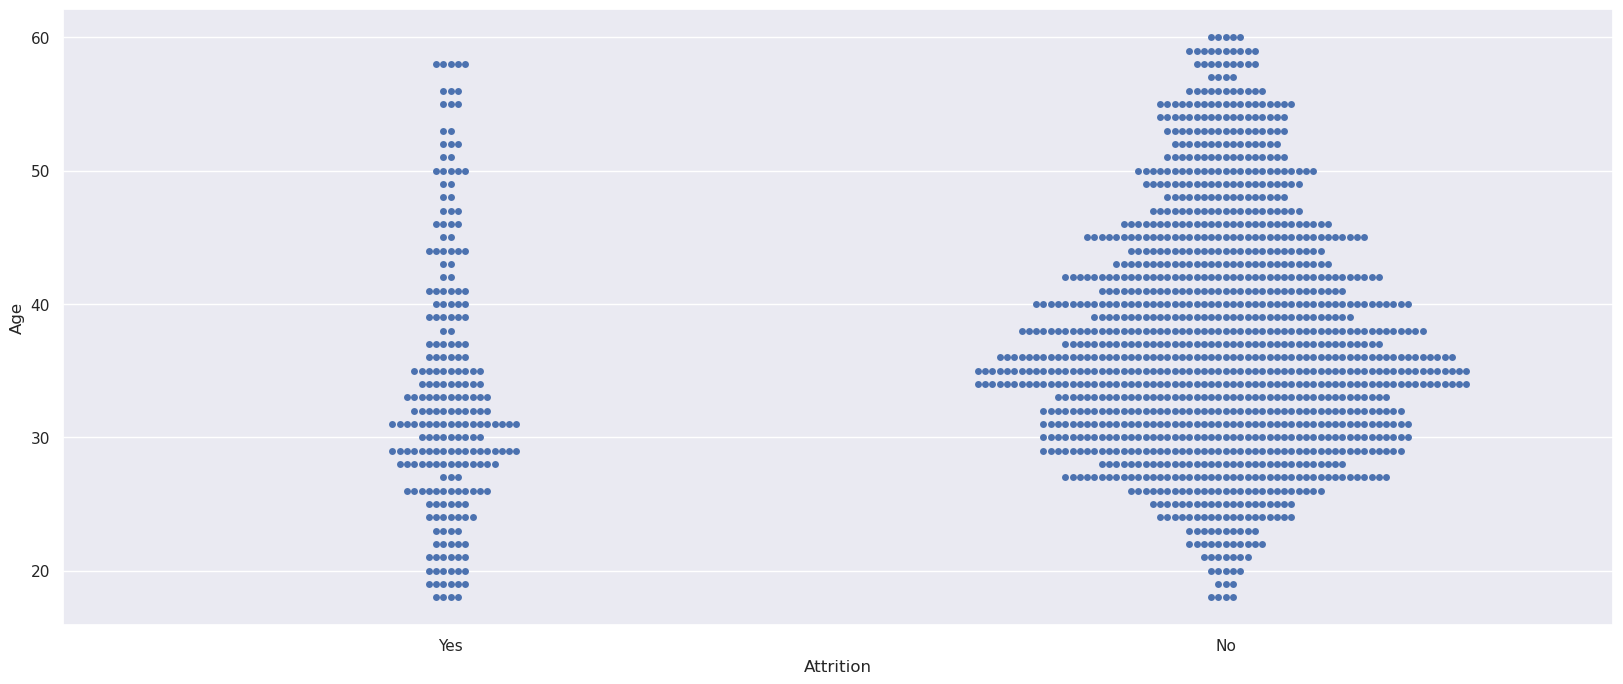

In [25]:
f = plt.figure(figsize=(20, 8))
sb.swarmplot(x = 'Attrition', y = 'Age', data = employee)

There seems to be more **younger people with attrition**. <br>
This means that retirement is not the main reason for attrition. <br>
Then what may be other possible reasons for attrition?
<br><br>
According to a blog posted by Mahidhar Reddy,
Source: https://www.linkedin.com/pulse/top-5-reasons-employee-attrition-how-deal-mahidhar-reddy <br>
the top factors for attrition are listed below:<br>
1. Money (other companies may be willing to pay more)
2. Quality of Work (mismatches between employees' capabilities and actual work)
3. Performance Pressure (pressured by high performing co-workers and demanding manager)
4. Friends (friend group may influence job change)
5. Location (company may be too far)<br>
<br>

We shall look into variables related to these factors.

/home/meng-wsl/miniconda3/envs/notebook/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot: xlabel='Attrition', ylabel='YearsWithCurrManager'>

/home/meng-wsl/miniconda3/envs/notebook/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


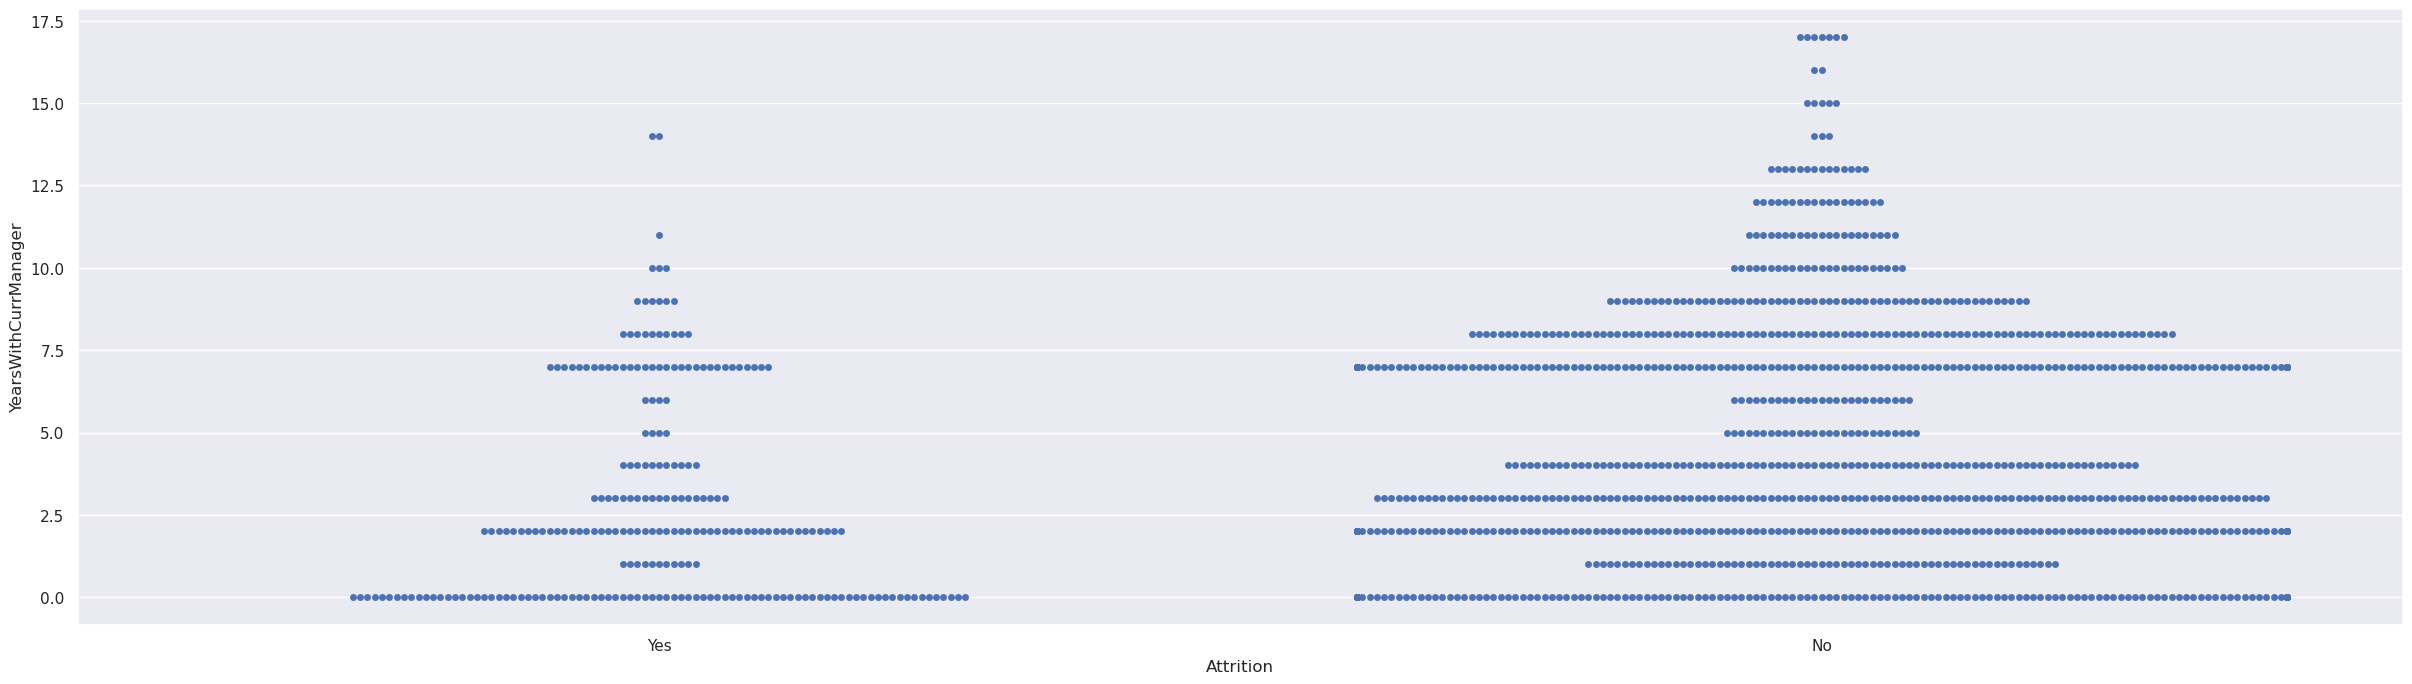

In [26]:
f = plt.figure(figsize=(30, 8))
sb.swarmplot(x = 'Attrition', y = 'YearsWithCurrManager', data = employee)

There are actually more people with attrition who have not spent one year with the current manager, <br>
and recall that previously we have also found that a large number of people with attrition are working in their first company. <br>
From this information, performance pressure may not be the main cause for attrition, instead our hypothesis is that people are probably just looking for other job opportunities. This hypothesis will be investigated below.

### Attrition and Count plot

In [26]:
attrition= employee.loc[employee["Attrition"]=='Yes']
attrition.head()

Age Attrition BusinessTravel  DailyRate              Department  \
0    41       Yes  Travel_Rarely       1102                   Sales   
2    37       Yes  Travel_Rarely       1373  Research & Development   
14   28       Yes  Travel_Rarely        103  Research & Development   
21   36       Yes  Travel_Rarely       1218                   Sales   
24   34       Yes  Travel_Rarely        699  Research & Development   

    DistanceFromHome  Education EducationField  EmployeeNumber  \
0                  1          2  Life Sciences               1   
2                  2          2          Other               4   
14                24          3  Life Sciences              19   
21                 9          4  Life Sciences              27   
24                 6          1        Medical              31   

    EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                         2  ...                 3                         1   
2                         4  ...                 3                         2   
14                        3  ...                 3                         2   
21                        3  ...                 4                         2   
24                        2  ...                 3                         3   

    StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  \
0                  0                  8                     0   
2                  0                  7                     3   
14                 0                  6                     4   
21                 0                 10                     4   
24                 0                  8                     2   

    WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                 1              6                   4   
2                 3              0                   0   
14                3              4                   2   
21                3              5                   3   
24                3              4                   2   

    YearsSinceLastPromotion  YearsWithCurrManager  
0                         0                     5  
2                         0                     0  
14                        0                     3  
21                        0                     3  
24                        1                     3  

[5 rows x 33 columns]

<Figure size 500x500 with 0 Axes>

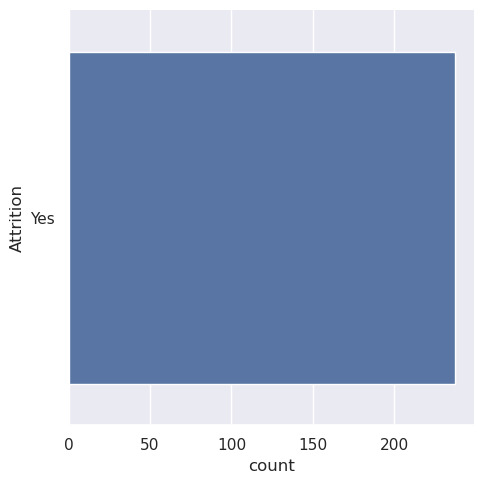

<Figure size 500x500 with 0 Axes>

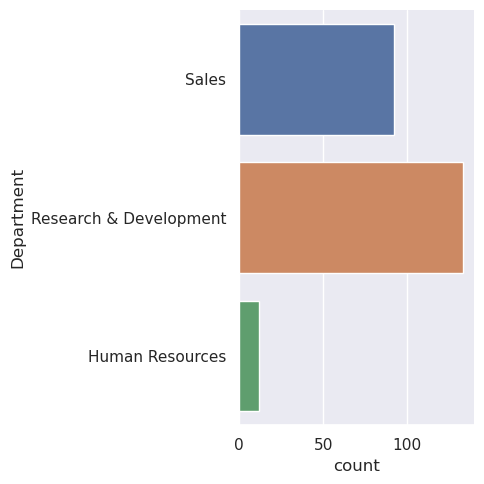

<Figure size 500x500 with 0 Axes>

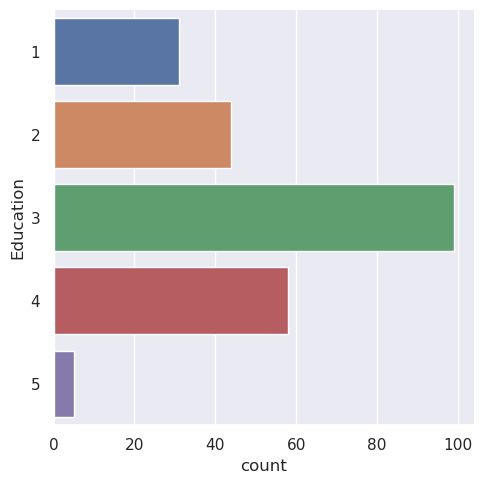

<Figure size 500x500 with 0 Axes>

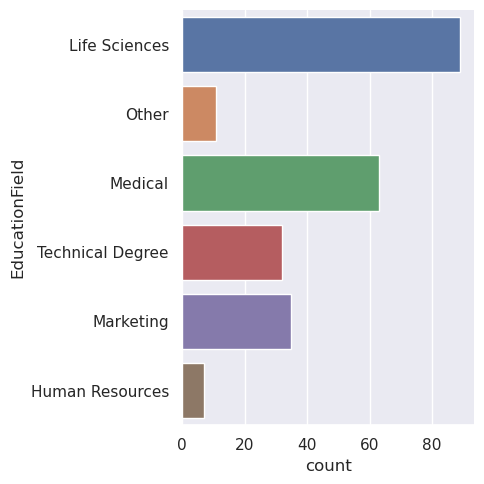

<Figure size 500x500 with 0 Axes>

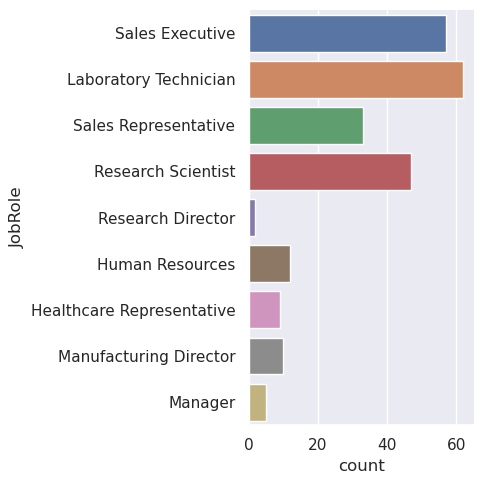

<Figure size 500x500 with 0 Axes>

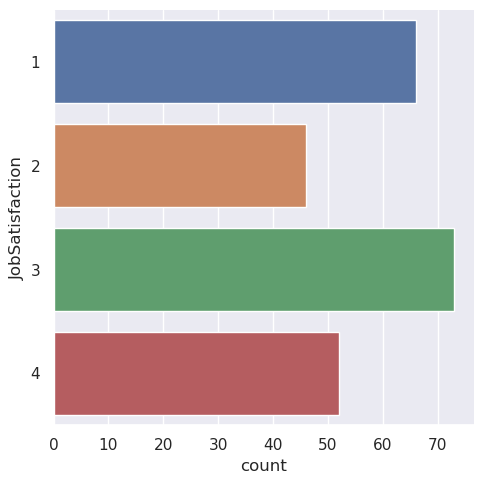

<Figure size 500x500 with 0 Axes>

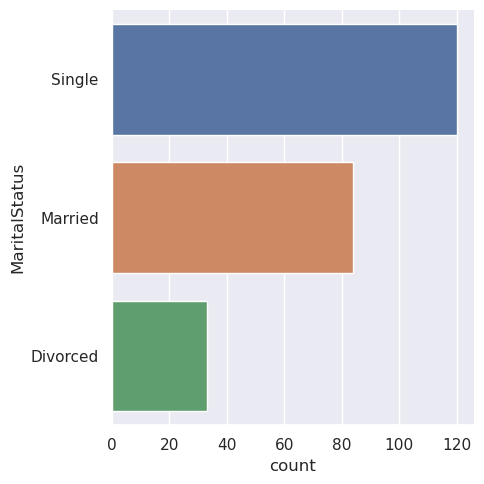

<Figure size 500x500 with 0 Axes>

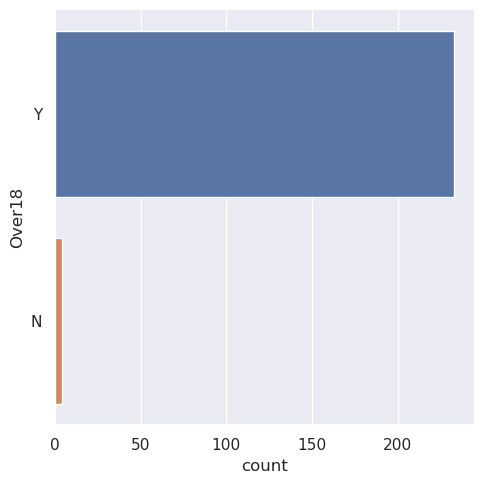

<Figure size 500x500 with 0 Axes>

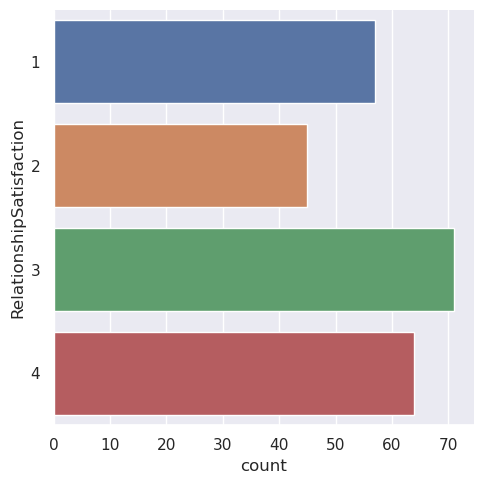

In [27]:
for var in cat_2:
    f = plt.figure(figsize=(5, 5))
    sb.catplot(y = var, data = attrition, kind = "count", height = 5)

Most of the people with attrition have the following similarities:
1. From **Research & Development** department, followed by **Sales** and lastly Human Resources 
2. Have an Education level of 3 (**Bachelor**)
3. Graduated from **Life Sciences**
4. Are currently working as **Lab Technicians** / **Research Scientist** / **Sales Representative**
5. Have a **Job Satisfaction of 3**, followed by **1 (least satisfied)**

Notes:<br>
It seems that it is least likely for research directors and managers to have attrition, <br>
probably because they are receiving the highest monthly income and highest job level possible. <br>
A possible reason for managers/research directors with attrition may be retirement as most of them are older than the other employees.

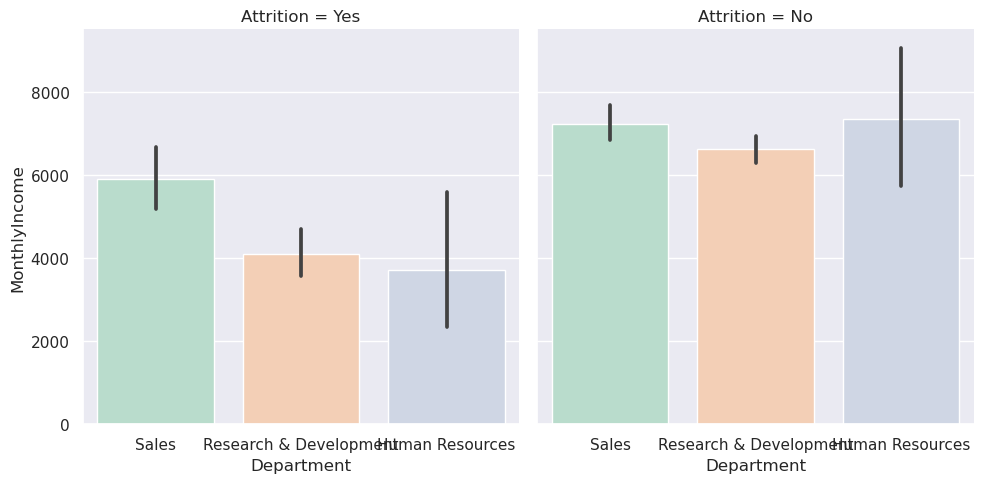

In [28]:
sb.catplot(x="Department", y="MonthlyIncome", col="Attrition", data=employee, kind="bar", palette= "Pastel2")

From this barplot, we observe that those with attrition are receiving a lower monthly income than those without attrition. <br>
In addition, among employees without attrition, those from human resources department are earning more than sales and research. However among those with attrition, monthly income for human resources is the lowest. <br><br>

With just barplots and boxplots alone, our prediction may not be accurate because the height or size of the plots may be affected by the number of employees corresponding to that category (ex. there are very few employees without attrition, hence there may be bias in the boxplots) <br>
Therefore we decided to create a random forest for a better classification accuracy of people with and without attrition. <br>
The first step is to encode the numerical variables and then balancing.

### OneHotEncoding <br>
Angelin and Pratham:

In [29]:
categorical.head()

Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences  Female   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   
2       Yes      Travel_Rarely  Research & Development          Other    Male   
3        No  Travel_Frequently  Research & Development  Life Sciences  Female   
4        No      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus Over18 OverTime  Education  \
0        Sales Executive        Single      Y      Yes          2   
1     Research Scientist       Married      Y       No          1   
2  Laboratory Technician        Single      Y      Yes          2   
3     Research Scientist       Married      Y      Yes          4   
4  Laboratory Technician       Married      Y       No          1   

   EnvironmentSatisfaction  JobInvolvement  JobSatisfaction  \
0                        2               3                4   
1                        3               2                2   
2                        4               2                3   
3                        4               3                3   
4                        1               3                2   

   PerformanceRating  RelationshipSatisfaction  WorkLifeBalance  JobLevel  \
0                  3                         1                1         2   
1                  4                         4                3         2   
2                  3                         2                3         1   
3                  3                         3                3         1   
4                  3                         4                3         1   

   StockOptionLevel  
0                 0  
1                 1  
2                 0  
3                 0  
4                 1

In [30]:
for i in range(len(categorical)):
    if(categorical.loc[i, "OverTime"]=="No"):
        categorical.loc[i,"OverTime"]=0
    else:
        categorical.loc[i,"OverTime"]=1

In [31]:
for i in range(len(categorical)):
    if(categorical.loc[i,"Gender"]=="Male"):
        categorical.loc[i,"Gender"]=1
    else:
        categorical.loc[i,"Gender"]=0

In [32]:
for i in range(len(categorical)):
    if(categorical.loc[i,"Over18"]=="Y"):
        categorical.loc[i,"Over18"]=1
    else:
        categorical.loc[i,"Over18"]=0

In [33]:
for i in range(len(categorical)):
    if(categorical.loc[i,"PerformanceRating"]==4):
        categorical.loc[i,"PerformanceRating"]=1
    else:
        categorical.loc[i,"PerformanceRating"]=0

In [34]:
for i in range(len(categorical)):
    if(categorical.loc[i,"Attrition"]=="Yes"):
        categorical.loc[i,"Attrition"]=1
    else:
        categorical.loc[i,"Attrition"]=0

In [35]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
encoded_data = categorical[['BusinessTravel','Department', 'EducationField','JobRole', 'MaritalStatus']]
ohe.fit(encoded_data)
encoded_data_ohe = pd.DataFrame(ohe.transform(encoded_data).toarray(), columns=ohe.get_feature_names_out(encoded_data.columns))

# Check the encoded variables
encoded_data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BusinessTravel_Non-Travel          1470 non-null   float64
 1   BusinessTravel_Travel_Frequently   1470 non-null   float64
 2   BusinessTravel_Travel_Rarely       1470 non-null   float64
 3   Department_Human Resources         1470 non-null   float64
 4   Department_Research & Development  1470 non-null   float64
 5   Department_Sales                   1470 non-null   float64
 6   EducationField_Human Resources     1470 non-null   float64
 7   EducationField_Life Sciences       1470 non-null   float64
 8   EducationField_Marketing           1470 non-null   float64
 9   EducationField_Medical             1470 non-null   float64
 10  EducationField_Other               1470 non-null   float64
 11  EducationField_Technical Degree    1470 non-null   float

/home/meng-wsl/miniconda3/envs/notebook/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
rest=categorical.copy()

In [37]:
rest.drop(columns=['BusinessTravel','Department', 'EducationField','JobRole', 'MaritalStatus'],inplace=True)

In [38]:
rest.head()

Attrition Gender Over18 OverTime  Education  EnvironmentSatisfaction  \
0         1      0      1        1          2                        2   
1         0      1      1        0          1                        3   
2         1      1      1        1          2                        4   
3         0      0      1        1          4                        4   
4         0      1      1        0          1                        1   

   JobInvolvement  JobSatisfaction  PerformanceRating  \
0               3                4                  0   
1               2                2                  1   
2               2                3                  0   
3               3                3                  0   
4               3                2                  0   

   RelationshipSatisfaction  WorkLifeBalance  JobLevel  StockOptionLevel  
0                         1                1         2                 0  
1                         4                3         2                 1  
2                         2                3         1                 0  
3                         3                3         1                 0  
4                         4                3         1                 1

In [39]:
final=pd.concat([num_data,rest,encoded_data_ohe],axis=1)
final.shape

(1470, 51)

In [40]:
pd.set_option('display.max_columns', None)
final.head()

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  MonthlyRate  \
0   41       1102                 1          94           5993        19479   
1   49        279                 8          61           5130        24907   
2   37       1373                 2          92           2090         2396   
3   33       1392                 3          56           2909        23159   
4   27        591                 2          40           3468        16632   

   NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0                   8                 11                  8   
1                   1                 23                 10   
2                   6                 15                  7   
3                   1                 11                  8   
4                   9                 12                  6   

   TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0                      0               6                   4   
1                      3              10                   7   
2                      3               0                   0   
3                      3               8                   7   
4                      3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition Gender Over18  \
0                        0                     5         1      0      1   
1                        1                     7         0      1      1   
2                        0                     0         1      1      1   
3                        3                     0         0      0      1   
4                        2                     2         0      1      1   

  OverTime  Education  EnvironmentSatisfaction  JobInvolvement  \
0        1          2                        2               3   
1        0          1                        3               2   
2        1          2                        4               2   
3        1          4                        4               3   
4        0          1                        1               3   

   JobSatisfaction  PerformanceRating  RelationshipSatisfaction  \
0                4                  0                         1   
1                2                  1                         4   
2                3                  0                         2   
3                3                  0                         3   
4                2                  0                         4   

   WorkLifeBalance  JobLevel  StockOptionLevel  BusinessTravel_Non-Travel  \
0                1         2                 0                        0.0   
1                3         2                 1                        0.0   
2                3         1                 0                        0.0   
3                3         1                 0                        0.0   
4                3         1                 1                        0.0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                               0.0                           1.0   
1                               1.0                           0.0   
2                               0.0                           1.0   
3                               1.0                           0.0   
4                               0.0                           1.0   

   Department_Human Resources  Department_Research & Development  \
0                         0.0                                0.0   
1                         0.0                                1.0   
2                         0.0                                1.0   
3                         0.0                                1.0   
4                         0.0                                1.0   

   Department_Sales  EducationField_Human Resources  \
0               1.0                             0.0   
1               0.0                             0.0   
2               0.0                             0.0   


In [41]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   DailyRate                          1470 non-null   int64  
 2   DistanceFromHome                   1470 non-null   int64  
 3   HourlyRate                         1470 non-null   int64  
 4   MonthlyIncome                      1470 non-null   int64  
 5   MonthlyRate                        1470 non-null   int64  
 6   NumCompaniesWorked                 1470 non-null   int64  
 7   PercentSalaryHike                  1470 non-null   int64  
 8   TotalWorkingYears                  1470 non-null   int64  
 9   TrainingTimesLastYear              1470 non-null   int64  
 10  YearsAtCompany                     1470 non-null   int64  
 11  YearsInCurrentRole                 1470 non-null   int64

In [42]:
for var in ["Attrition", "Gender", "Over18", "OverTime"]:
    final[var]= final[var].astype('int')

In [43]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   DailyRate                          1470 non-null   int64  
 2   DistanceFromHome                   1470 non-null   int64  
 3   HourlyRate                         1470 non-null   int64  
 4   MonthlyIncome                      1470 non-null   int64  
 5   MonthlyRate                        1470 non-null   int64  
 6   NumCompaniesWorked                 1470 non-null   int64  
 7   PercentSalaryHike                  1470 non-null   int64  
 8   TotalWorkingYears                  1470 non-null   int64  
 9   TrainingTimesLastYear              1470 non-null   int64  
 10  YearsAtCompany                     1470 non-null   int64  
 11  YearsInCurrentRole                 1470 non-null   int64

In [44]:
att= employee.loc[employee["Attrition"]=="Yes"]

In [45]:
no_att= employee.loc[employee["Attrition"]=="No"]

In [46]:
y = pd.DataFrame(final['Attrition'])
X = pd.DataFrame(final.drop(columns=['Attrition']))

In [47]:
y.shape

(1470, 1)

In [48]:
X.shape

(1470, 50)

## Correlation with Attrition <br>
Angelin:

In [49]:
final.drop('Attrition', axis=1).corrwith(final.Attrition).sort_values()

TotalWorkingYears                   -0.171063
JobLevel                            -0.169105
YearsInCurrentRole                  -0.160545
MonthlyIncome                       -0.159840
Age                                 -0.159205
YearsWithCurrManager                -0.156199
StockOptionLevel                    -0.137145
YearsAtCompany                      -0.134392
JobInvolvement                      -0.130016
JobSatisfaction                     -0.103481
EnvironmentSatisfaction             -0.103369
MaritalStatus_Married               -0.090984
JobRole_Research Director           -0.088870
MaritalStatus_Divorced              -0.087716
Department_Research & Development   -0.085293
JobRole_Manager                     -0.083316
JobRole_Manufacturing Director      -0.082994
JobRole_Healthcare Representative   -0.078696
BusinessTravel_Non-Travel           -0.074457
Over18                              -0.068147
WorkLifeBalance                     -0.063939
TrainingTimesLastYear             

<AxesSubplot: >

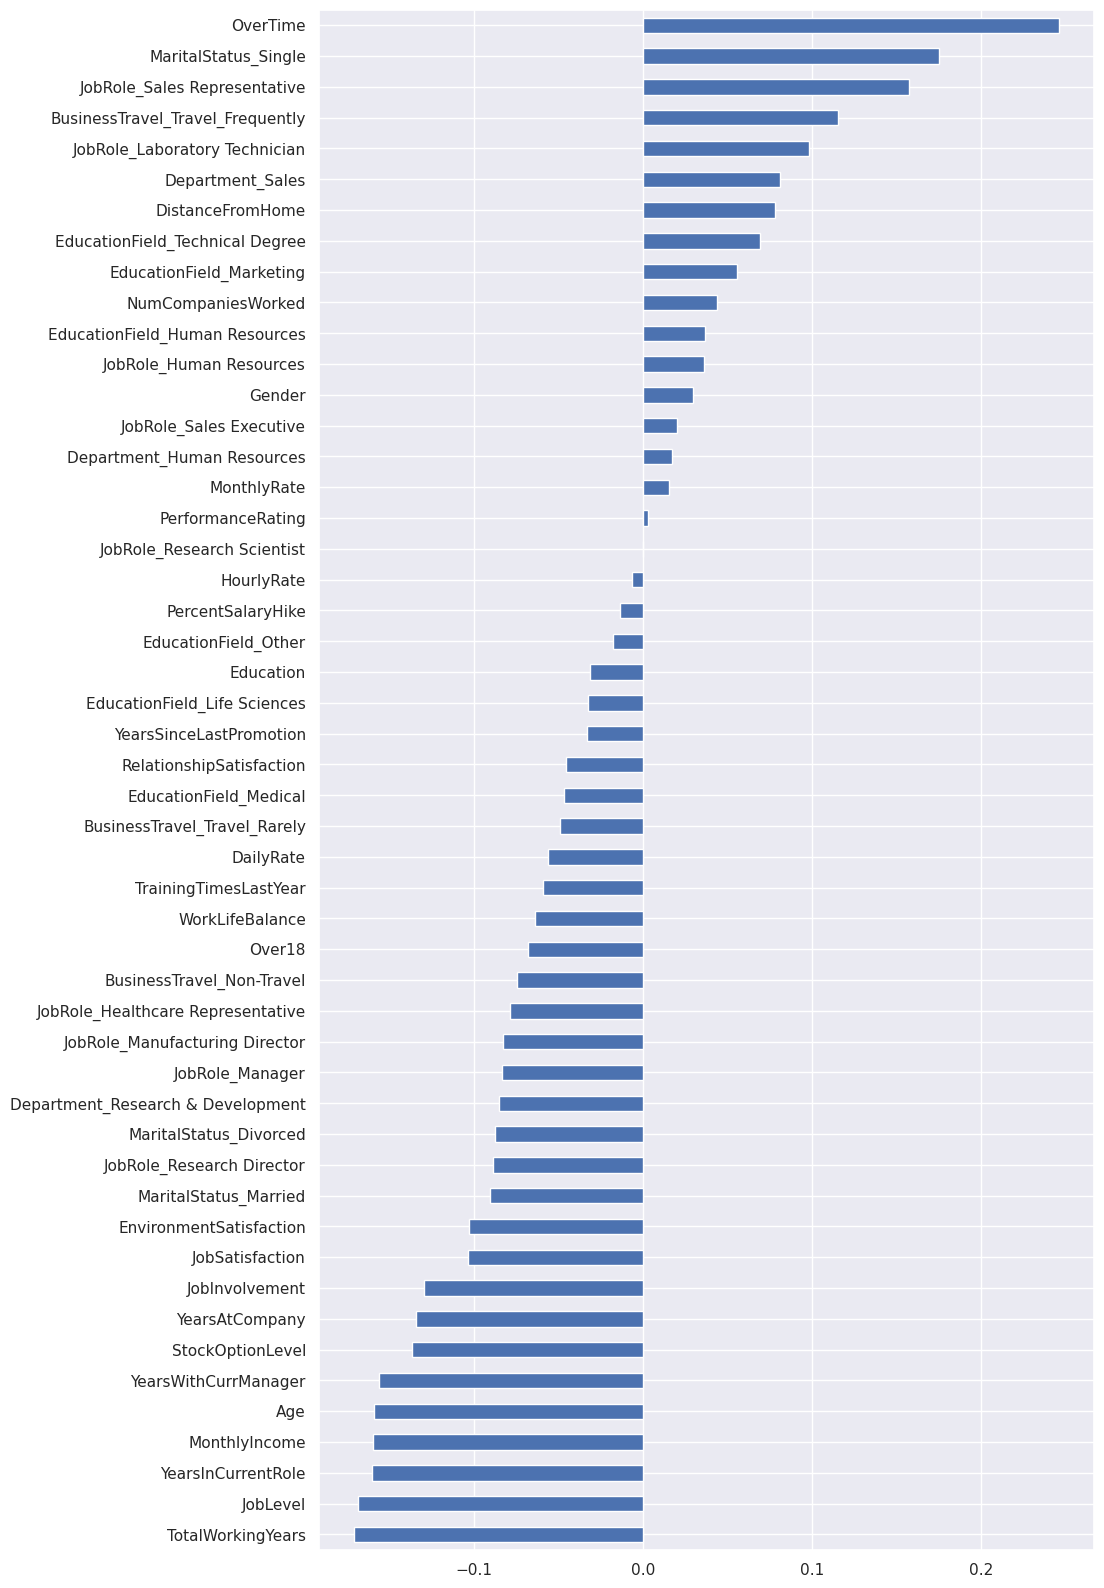

In [50]:
final.drop('Attrition', axis=1).corrwith(final.Attrition).sort_values().plot(kind= 'barh', figsize=(10,20))

According to the plot, the following variables have a significant correlation with atrition: <br>
*variables are chosen based on correlation less than -0.12 and greater than 0.12*
1. OverTime
2. MaritalStatus_Single
3. TotalWorkingYears  
4. JobLevel              
5. YearsInCurrentRole        
6. MonthlyIncome   
7. Age   
8. JobRole_SalesRepresentative   
9. YearsWithCurrManager   
10. StockOptionLevel  
11. YearsAtCompany  
12. JobInvolvement  

*variables are arranged in descending order, ignoring the positive negative sign* <br>
Now let us comfirm these variables by plotting a decision tree!

## Plotting a Classification Decision Tree to predict attrition <br>
Angelin:

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 1)
dectree = DecisionTreeClassifier(max_depth = 3)  
dectree.fit(X_train, y_train)                   

DecisionTreeClassifier(max_depth=3)

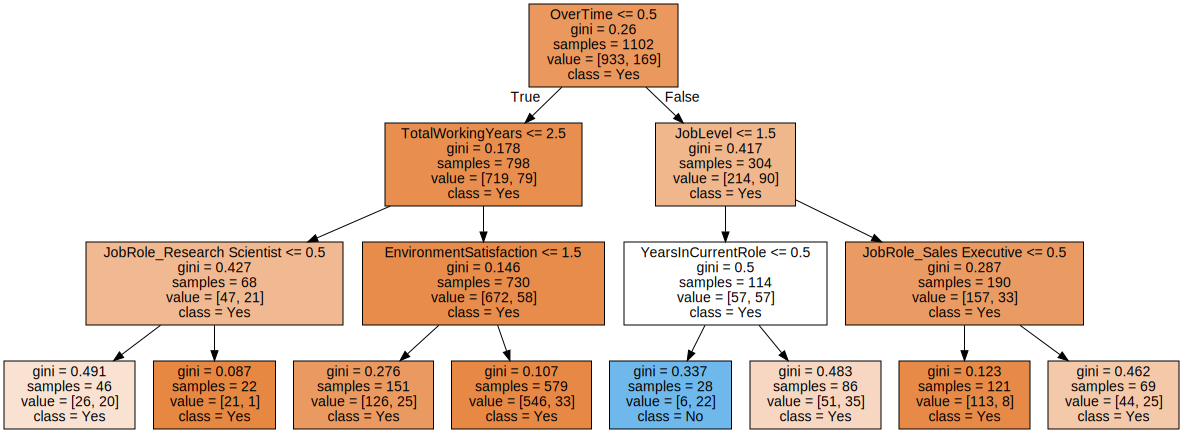

In [52]:
treedot= export_graphviz(dectree,
          feature_names= X_train.columns,
          out_file=None,
          filled=True,
          class_names=["Yes","No"])

import graphviz                  
graphviz.Source(treedot)                 

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8611615245009074

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8260869565217391



<AxesSubplot: >

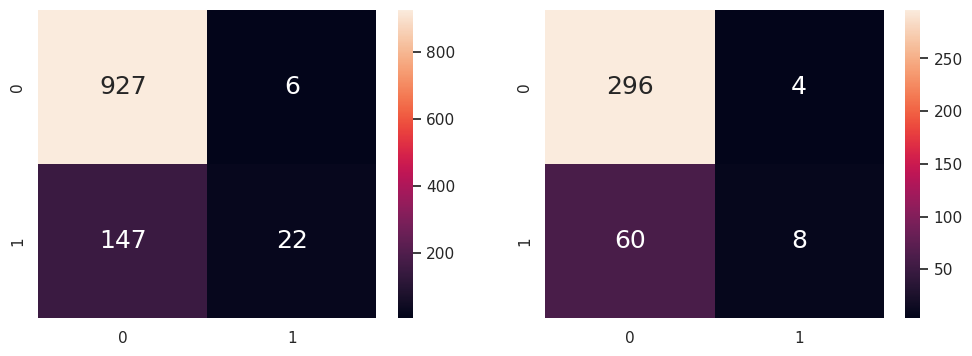

In [53]:
# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

As we have found in our exploratory data analysis section when we plotted a countplot for Attrition, the dataset is imbalanced.
Here the correlation matrix also shows that it is very imbalanced (leaning to the left), meaning that there are more chances of predicting a negative outcome. Those who actually have attrition are being classified as having no attrition (false negative). <br>
Therefore we must balance the tree to have a higher chance of classifying the employees correctly. <br>

### Balancing

In [54]:
no= final[final["Attrition"]==0]
yes= final[final["Attrition"]==1]
from sklearn.utils import resample

dataN_upsample= resample(yes, n_samples= no.shape[0])
data_upsample= pd.concat([no, dataN_upsample])

data_upsample.shape

(2466, 51)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7193077339102217

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7536466774716369



<AxesSubplot: >

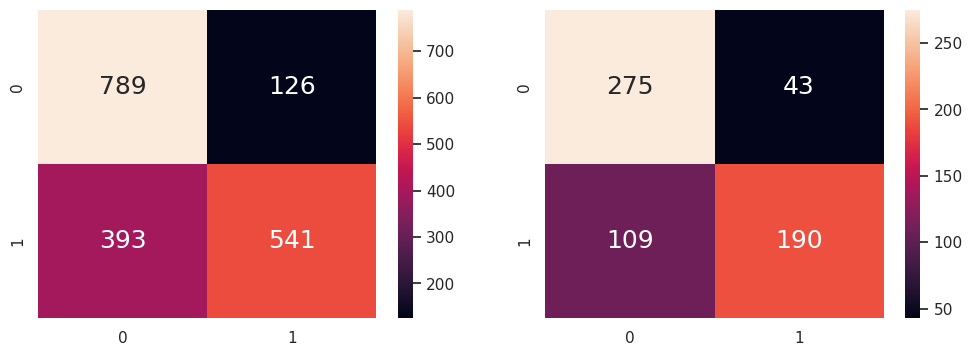

In [55]:
y = pd.DataFrame(data_upsample['Attrition'])
X = pd.DataFrame(data_upsample.drop(columns=['Attrition']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 1)


dectree = DecisionTreeClassifier(max_depth = 3)  
dectree.fit(X_train, y_train)                   

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Now the tree is more balanced and we can move on to our random forest. <br>
In order to have the most ideal number of trees and depth, we use GridSearchCV

In [56]:
from sklearn.ensemble import RandomForestClassifier

param_grid= {'n_estimators': np.arange(100, 250, 50), 'max_depth': np.arange(2,8)}

rforest = RandomForestClassifier()       

from sklearn.model_selection import GridSearchCV
CV_rfr= GridSearchCV(estimator= rforest, param_grid= param_grid)
CV_rfr.fit(X_train, y_train.Attrition.ravel())

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'n_estimators': array([100, 150, 200])})

In [57]:
CV_rfr.best_params_

{'max_depth': 7, 'n_estimators': 200}

In [58]:
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 7)       
rforest.fit(X_train, y_train.Attrition.ravel()) 

RandomForestClassifier(max_depth=7)

Train Data
Accuracy  :	 0.9572742022714981

TPR Train :	 0.9475374732334048
TNR Train :	 0.9672131147540983

FPR Train :	 0.03278688524590164
FNR Train :	 0.05246252676659529


<AxesSubplot: >

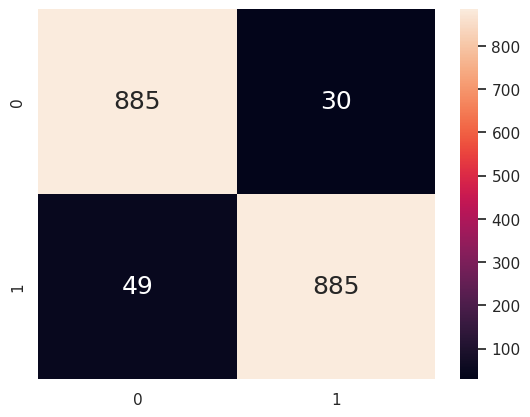

In [59]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18})

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))
# precision – What percent of your predictions were correct?
# f1- What percent of positive predictions were correct?
# recall – What percent of the positive cases did you catch? 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       915
           1       0.97      0.95      0.96       934

    accuracy                           0.96      1849
   macro avg       0.96      0.96      0.96      1849
weighted avg       0.96      0.96      0.96      1849



Test Data
Accuracy  :	 0.9157212317666127

TPR Test :	 0.9297658862876255
TNR Test :	 0.9025157232704403

FPR Test :	 0.09748427672955975
FNR Test :	 0.07023411371237458


<AxesSubplot: >

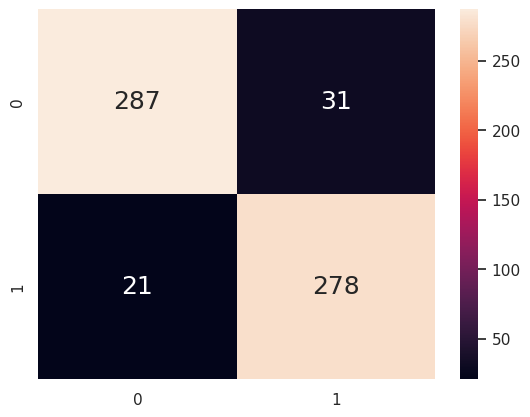

In [61]:
y_test_pred = rforest.predict(X_test)

print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

cmtest = confusion_matrix(y_test, y_test_pred)
tptest = cmtest[1][1] # True Positives : Good (1) predicted Good (1)
fptest = cmtest[0][1] # False Positives : Bad (0) predicted Good (1)
tntest = cmtest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fntest = cmtest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tptest/(tptest + fntest)))
print("TNR Test :\t", (tntest/(tntest + fptest)))
print()

print("FPR Test :\t", (fptest/(tntest + fptest)))
print("FNR Test :\t", (fntest/(tptest + fntest)))

sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18})

In this correlation matrix, we observe that we have a very high accuracy, with a high true positive and true negative rate. <br>
Meaning that we have a better chance of identifying the employees with and without attrition correctly.<br>

In [62]:
print(classification_report(y_test, y_test_pred))
# precision – What percent of your predictions were correct?
# f1- What percent of positive predictions were correct?
# recall – What percent of the positive cases did you catch? 

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       318
           1       0.90      0.93      0.91       299

    accuracy                           0.92       617
   macro avg       0.92      0.92      0.92       617
weighted avg       0.92      0.92      0.92       617



Confusion matrix uses a fixed threshold of 0.5, <br>
how about we use a ROC curve to look for the best threshold? <br>
<br>
*threshold at 0.5 (default) means that it classifies everything above 0.5 as admitted and everything below 0.5 as not admitted*

In [63]:
import plotly.express as px
from sklearn.metrics import roc_curve, auc
y_trainscore = rforest.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_trainscore)
gmeans = np.sqrt(tpr * (1-fpr)) 

index = np.argmax(gmeans) #index of largest g-mean
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[index], gmeans[index]))

Best Threshold=0.465487, G-Mean=0.958


Geometric mean is the measure of imbalanced classification <br>
An optimal G-Mean will look for a balance between sensitivity (recall) and specificity <br>
Sensitivity= True Positive Rate <br>
Specificity= 1- False Positive Rate<br>
<br>
Receiver Operating Characteristic curve (ROC) <br>
false-positive rate on the x-axis, true positive rate on the y-axis <br>
The diagonal, dashed line = no-skill (random) classifier (worse case 0.5), and a point in the top left (1.0) = perfect skill.

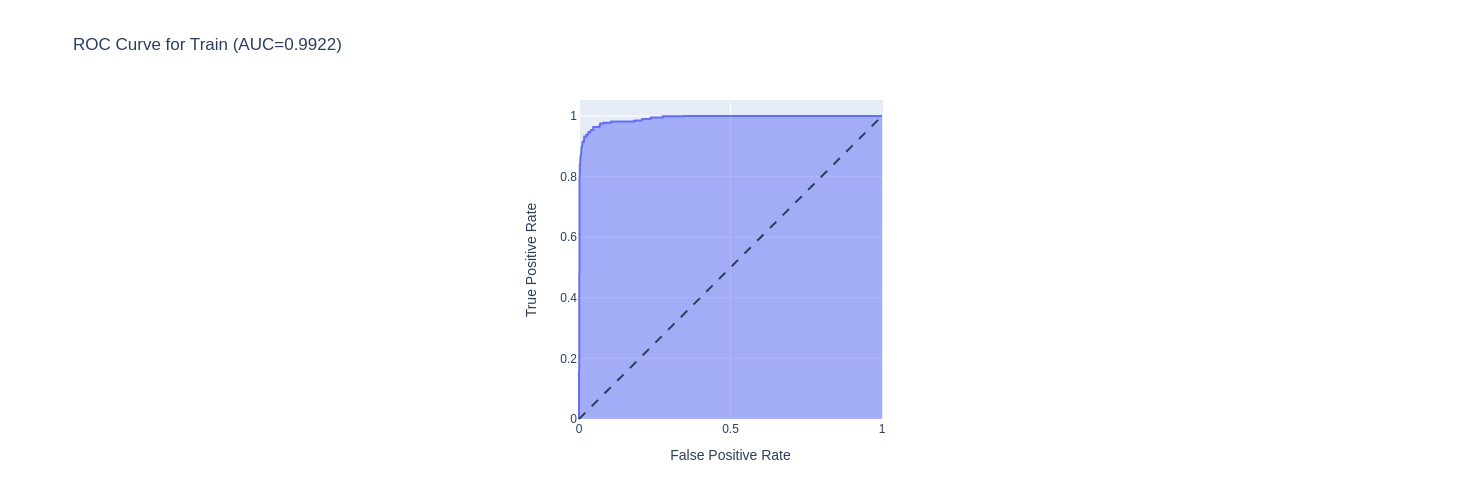

In [64]:
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve for Train (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)

fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

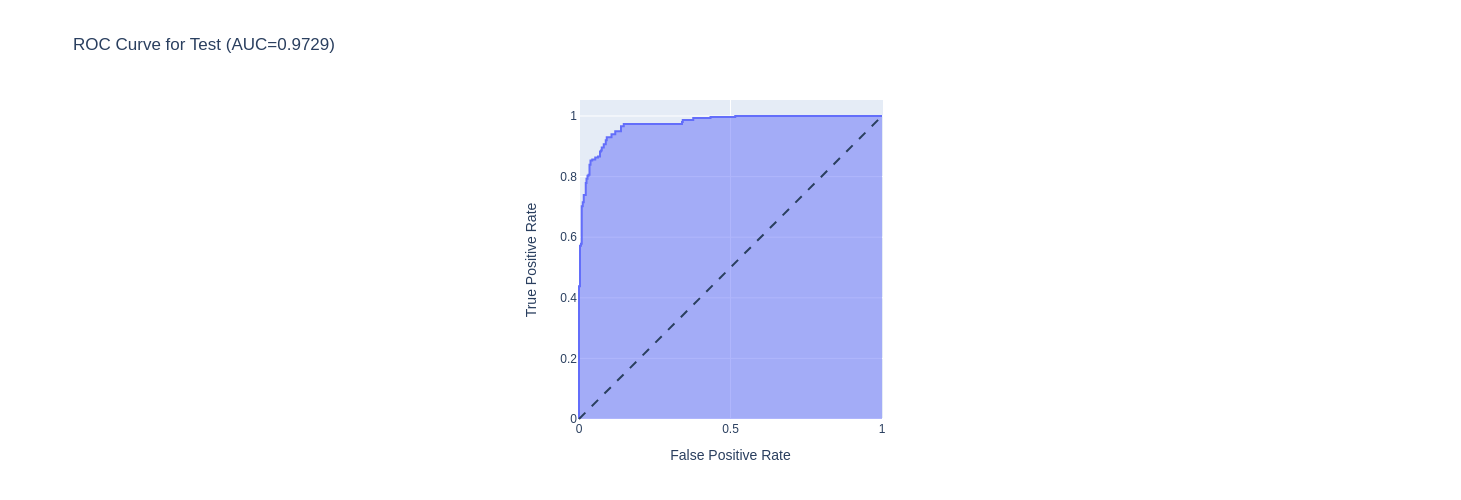

In [65]:
from sklearn.metrics import roc_curve, auc
y_testscore = rforest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_testscore)
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve for Test (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

In [66]:
importances = rforest.feature_importances_
std = np.std([tree.feature_importances_ for tree in rforest.estimators_],
             axis=0)

Let us take a look at the important factors that determines attrition!

In [67]:
importance=pd.DataFrame()
importance['Predictors']=X.columns
importance['Importance']=std

In [68]:
importance

Predictors  Importance
0                                 Age    0.031964
1                           DailyRate    0.025359
2                    DistanceFromHome    0.022483
3                          HourlyRate    0.020759
4                       MonthlyIncome    0.050739
5                         MonthlyRate    0.024021
6                  NumCompaniesWorked    0.022141
7                   PercentSalaryHike    0.017426
8                   TotalWorkingYears    0.042362
9               TrainingTimesLastYear    0.017437
10                     YearsAtCompany    0.041596
11                 YearsInCurrentRole    0.036543
12            YearsSinceLastPromotion    0.016833
13               YearsWithCurrManager    0.042431
14                             Gender    0.008463
15                             Over18    0.001349
16                           OverTime    0.049435
17                          Education    0.011107
18            EnvironmentSatisfaction    0.022336
19                     JobInvolvement    0.017117
20                    JobSatisfaction    0.024501
21                  PerformanceRating    0.005605
22           RelationshipSatisfaction    0.015130
23                    WorkLifeBalance    0.016125
24                           JobLevel    0.037119
25                   StockOptionLevel    0.046549
26          BusinessTravel_Non-Travel    0.010255
27   BusinessTravel_Travel_Frequently    0.011076
28       BusinessTravel_Travel_Rarely    0.006255
29         Department_Human Resources    0.002761
30  Department_Research & Development    0.013412
31                   Department_Sales    0.015723
32     EducationField_Human Resources    0.003879
33       EducationField_Life Sciences    0.006855
34           EducationField_Marketing    0.005935
35             EducationField_Medical    0.006721
36               EducationField_Other    0.002494
37    EducationField_Technical Degree    0.010261
38  JobRole_Healthcare Representative    0.005980
39            JobRole_Human Resources    0.003655
40      JobRole_Laboratory Technician    0.007861
41                    JobRole_Manager    0.009582
42     JobRole_Manufacturing Director    0.006634
43          JobRole_Research Director    0.012316
44         JobRole_Research Scientist    0.007727
45            JobRole_Sales Executive    0.014070
46       JobRole_Sales Representative    0.013066
47             MaritalStatus_Divorced    0.012175
48              MaritalStatus_Married    0.010655
49               MaritalStatus_Single    0.028961

<AxesSubplot: xlabel='Importance', ylabel='Predictors'>

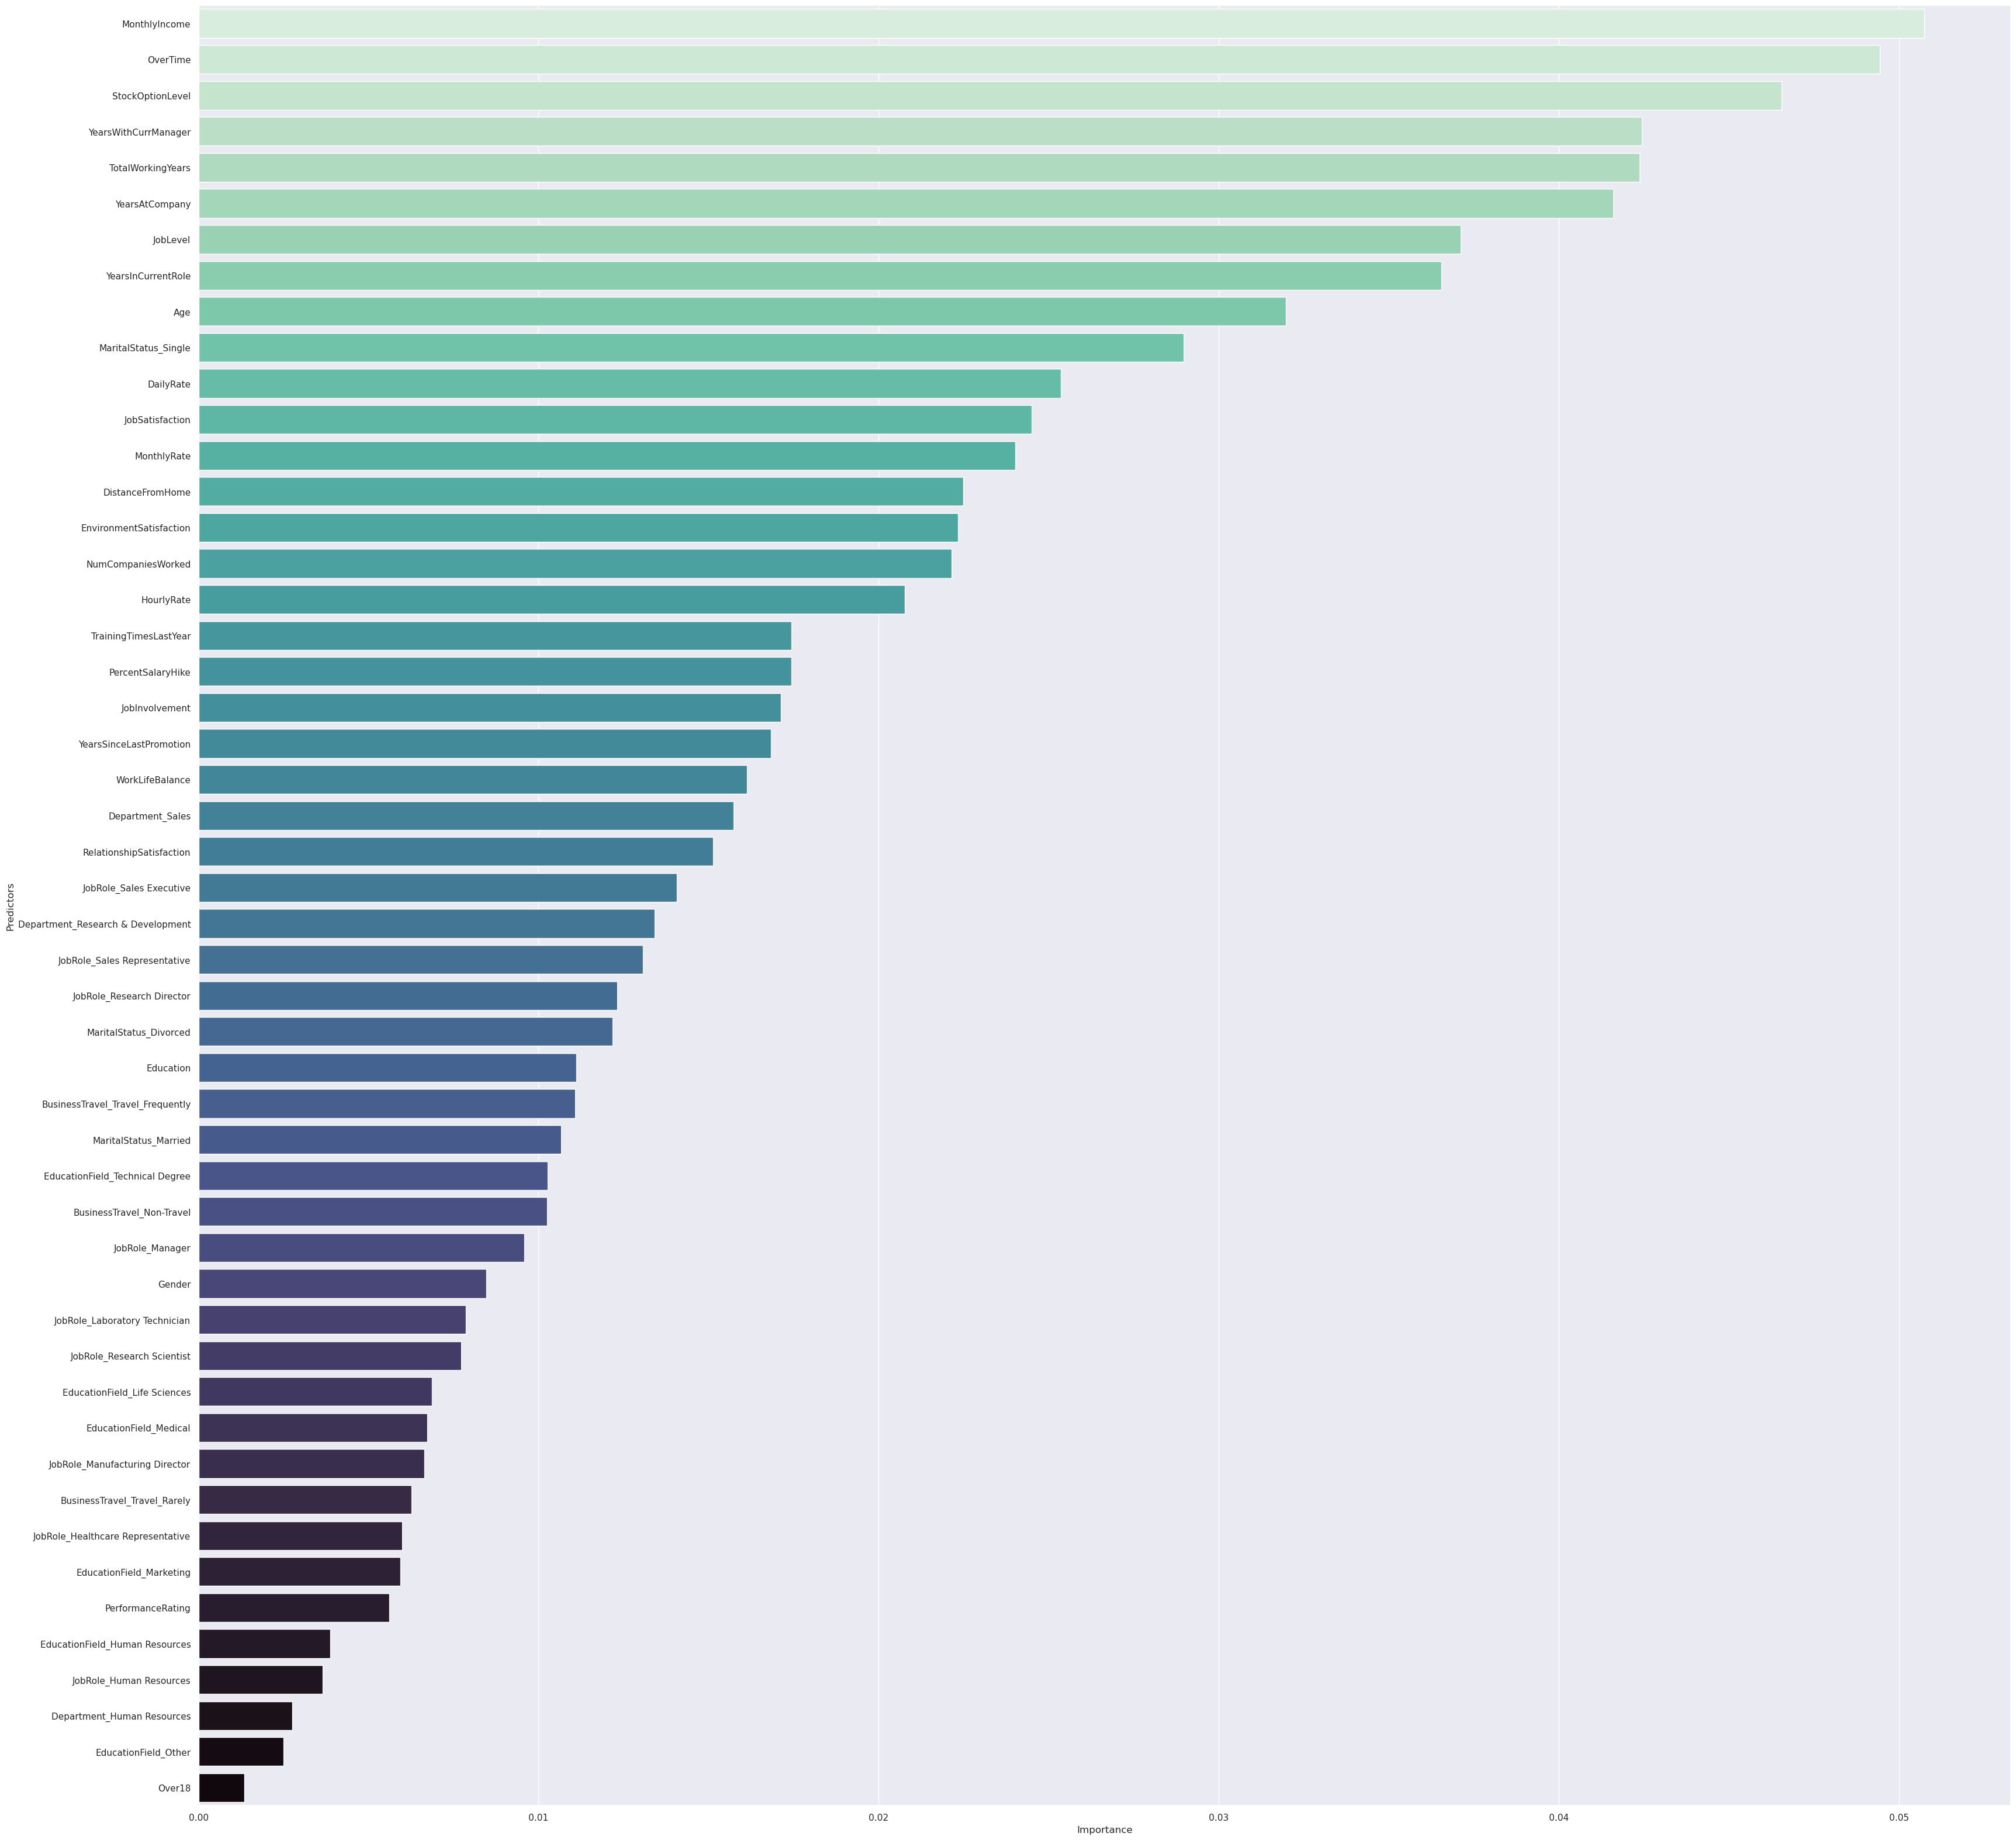

In [69]:
importance.sort_values(by=['Importance'], ascending=False,inplace=True)
f = plt.figure(figsize=(40, 40))
sb.barplot(x=importance["Importance"], y=importance["Predictors"], palette= "mako_r")

#### Variable Importance  (AFTER BALANCING)

1. Overtime
2. Monthly Income
3. Years At Company
4. Job Level
5. Age
6. Years In Current Role
7. Total Working Years
8. Stock Option Level
9. Years With Current Manager

These are the top factors affecting attrition. <br><br>
*Train Test Split has been fixed with random state of 1.<br>
Without random state, these 9 variables are still in the top 9 importance but may be in different ranks.<br>
(ex. Monthly Income may become more important than Overtime, but is still within the 9 ranks)*<br>
<br>
Let us now observe the correlation!

### 1. Attrition and Monthly Income

<AxesSubplot: xlabel='Attrition', ylabel='MonthlyIncome'>

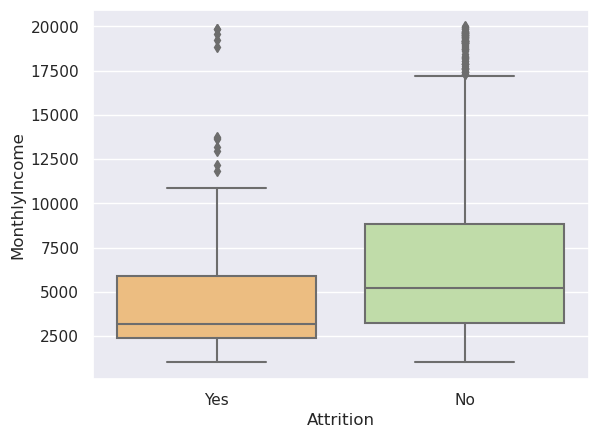

In [70]:
sb.boxplot(x = "Attrition", y = "MonthlyIncome", data = employee, palette='Spectral')

From the correlation plot earlier, the **correlation** with monthly income is also **negative**. <br>
Employees **with attrition** have **lower monthly income**. <br>
We predict that employees are leaving the company to look for better offers from other companies.

<AxesSubplot: xlabel='JobSatisfaction', ylabel='MonthlyIncome'>

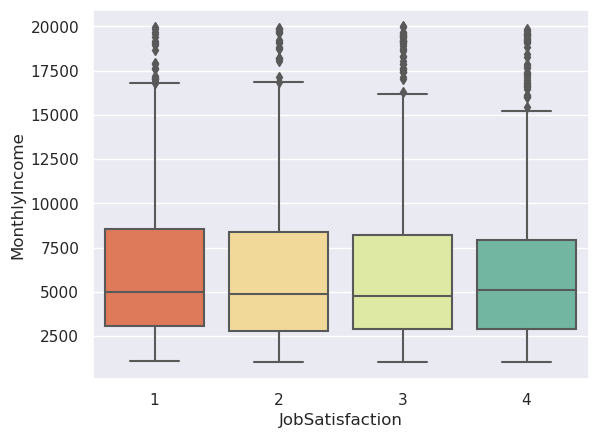

In [71]:
sb.boxplot(x = "JobSatisfaction", y = "MonthlyIncome", data = employee, palette='Spectral')

/tmp/ipykernel_1493/1573064117.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




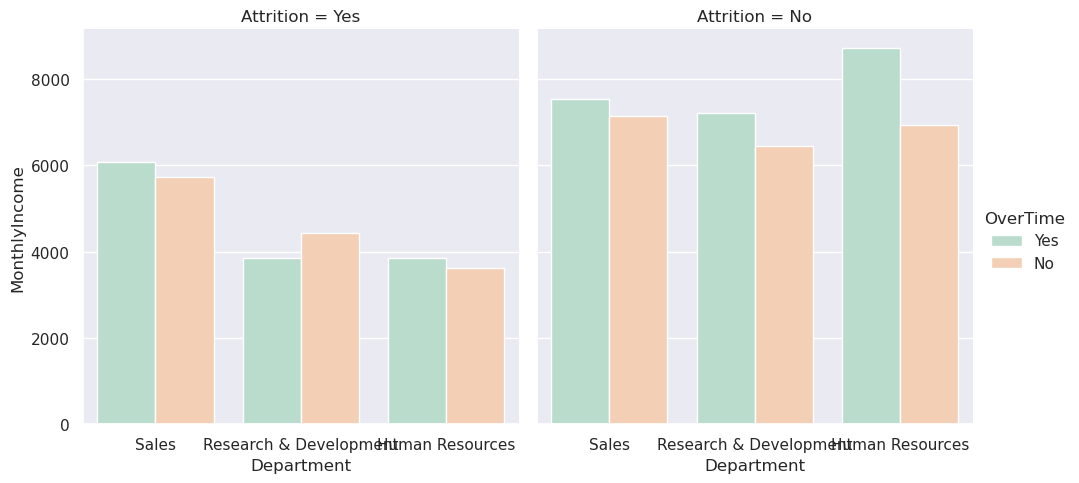

In [72]:
sb.catplot(x="Department", y="MonthlyIncome",hue='OverTime',
                col="Attrition", data=employee, kind="bar", palette= "Pastel2", ci=None)

Attired employees from Research department and working overtime are actually receiving less than those who are not working overtime. They may have felt it was unfair to be receiving less even after working overtime, hence they attire.

### 2. Attrition and Years With Current Manager

<AxesSubplot: xlabel='Attrition', ylabel='YearsWithCurrManager'>

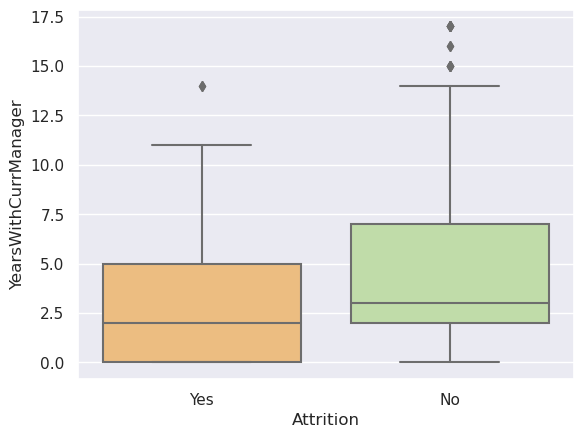

In [73]:
sb.boxplot(x = "Attrition", y = "YearsWithCurrManager", data = employee, palette='Spectral')

From the correlation plot earlier, the **correlation** with years with current manager is also **negative**. <br>
Employees **with attrition** have **lower years with current manager**.

### 3. Attrition and Total Working Years

<AxesSubplot: xlabel='Attrition', ylabel='TotalWorkingYears'>

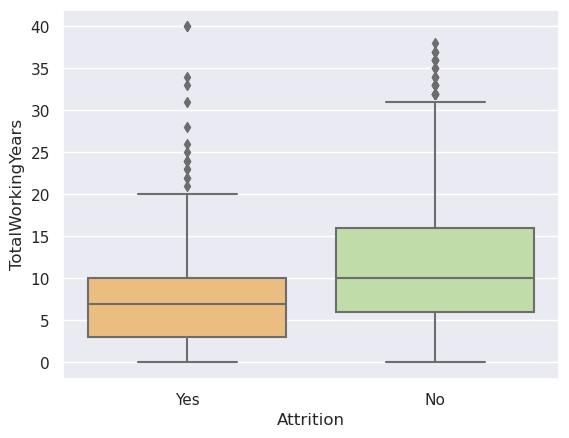

In [74]:
sb.boxplot(x = "Attrition", y = "TotalWorkingYears", data = employee, palette='Spectral')

From the correlation plot earlier, the **correlation** with total working years is also **negative**. <br>
Employees **with attrition** have **lower total working years**.

### 4. Attrition and Years At Company

<AxesSubplot: xlabel='Attrition', ylabel='YearsAtCompany'>

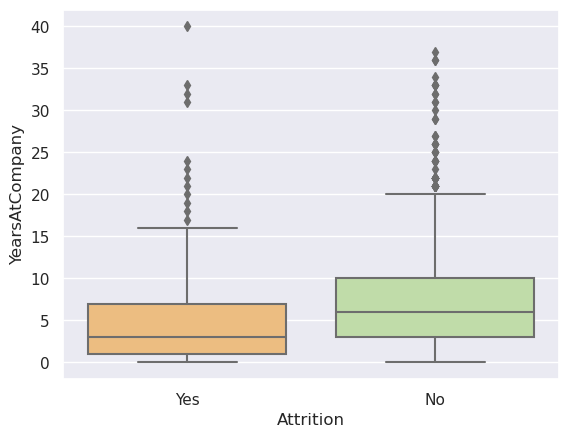

In [75]:
sb.boxplot(x = "Attrition", y = "YearsAtCompany", data = employee, palette='Spectral')

From the correlation plot earlier, the **correlation** with years at company is also **negative**. <br>
Employees **with attrition** have **lower working years at the company**. <br>
#2, #3, #4 all shows evidence that employees with less work experience are leaving the company. <br>
We believe that it is because the employees want to explore other job opportunities and different work environment.

### 5. Attrition and Job Level

<AxesSubplot: xlabel='Attrition', ylabel='JobLevel'>

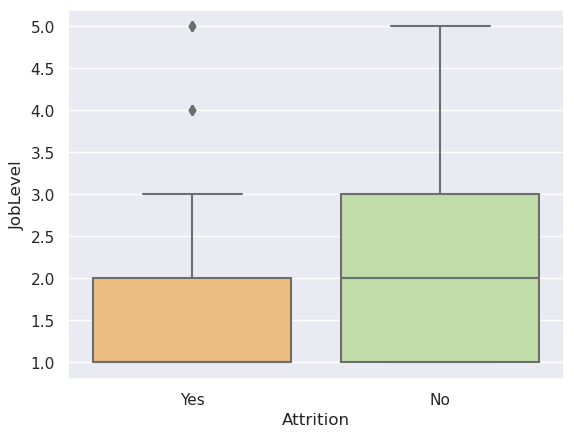

In [76]:
sb.boxplot(x = "Attrition", y = "JobLevel", data = employee, palette='Spectral')

From the correlation plot earlier, the **correlation** with job level is also **negative**. <br>
Employees with a **lower job level** are most likely to **attire**. <br>
This is probably because they are not satisfied with the position they are in now, and want to look for a company that may give them a promotion or better opportunities.

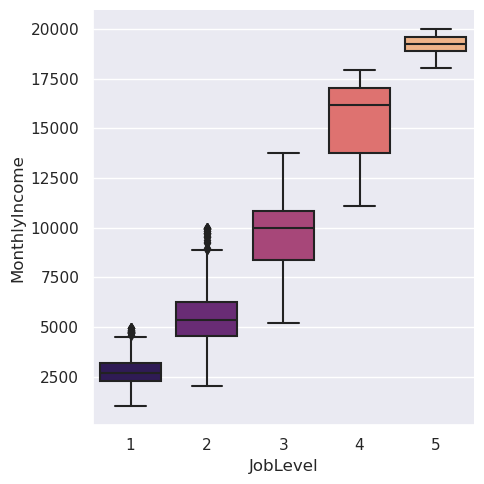

In [77]:
sb.catplot(x="JobLevel", y="MonthlyIncome", kind="box", data=employee, palette="magma", ci=None)

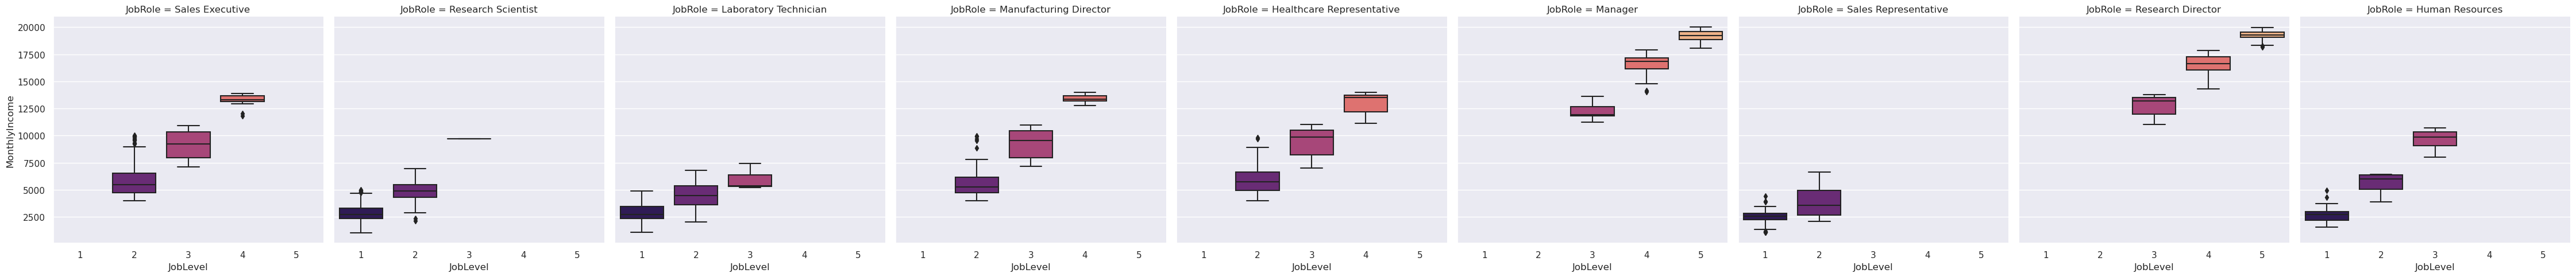

In [78]:
sb.catplot(x="JobLevel", y="MonthlyIncome", col= "JobRole", kind="box", data=employee, palette="magma", ci=None)

/tmp/ipykernel_1493/1029885248.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




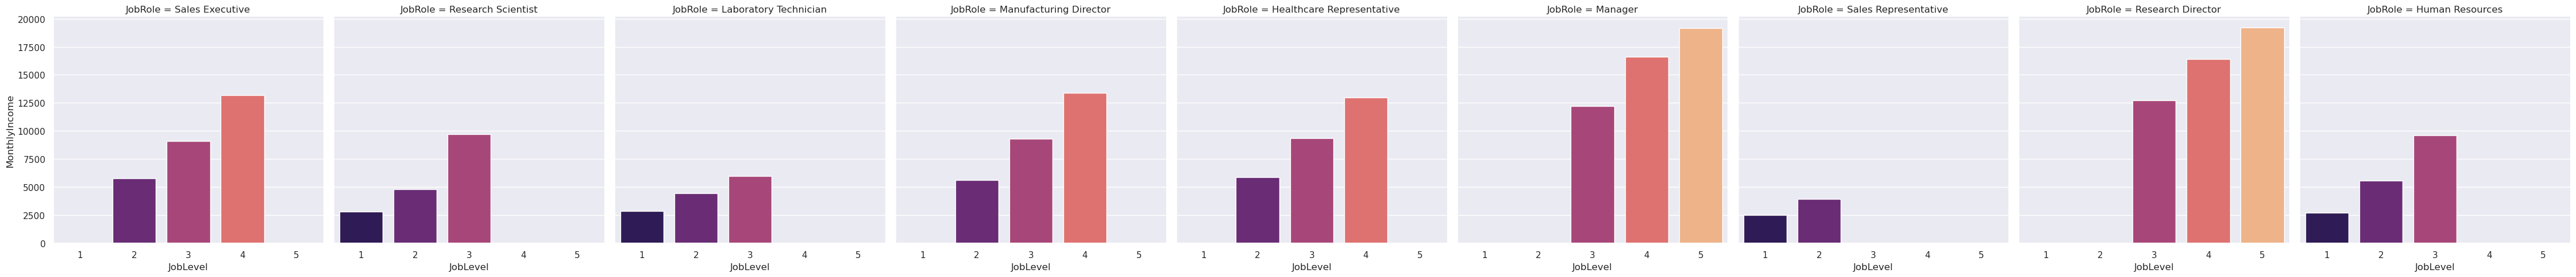

In [79]:
sb.catplot(x="JobLevel", y="MonthlyIncome", col= "JobRole", kind="bar", data=employee, palette="magma", ci=None)

##### Job Level
is the classification of authority and/or salary levels of positions in an organization. <br>
Ex. senior executives, executive, middle management, advisors, associate <br><br>
Each job role has different job levels. <br>
Ex. Senior Executive Manager or Executive Manager <br><br>
Different job levels have different monthly income.<br>
The higher your job level, the higher your monthly income. <br><br>
From the bar charts we can also see 4 hierarchy: <br>
Highest- Managers and Research Directors <br>
2nd- Sales Executive, Manufacturing Director, Healthcare Representative<br>
3rd- Research Scientist, Lab Technician, Human Resources

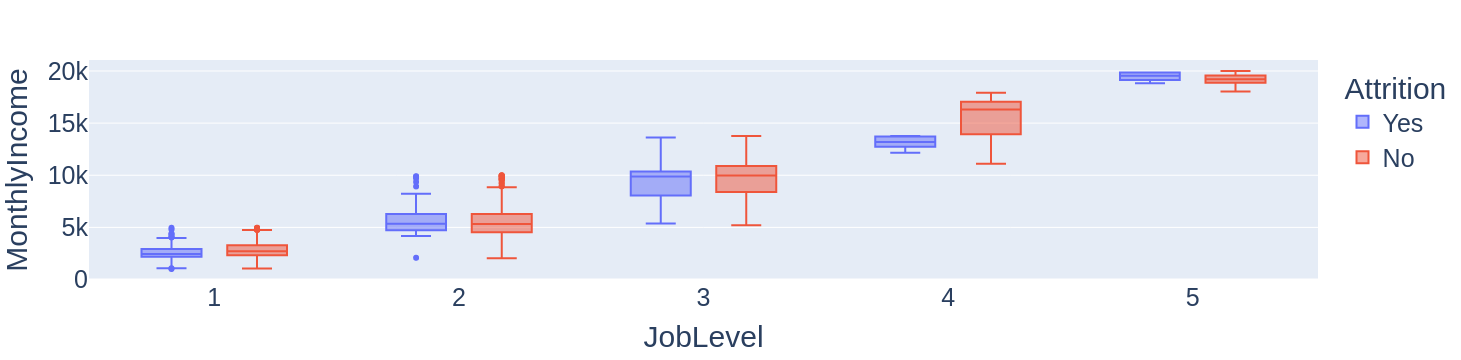

In [80]:
fig = px.box(employee, x="JobLevel", y="MonthlyIncome", color="Attrition", width=500)
fig.show()

**Difference in Median Monthly Income (Not Attiring - Attiring)** <br>
<br>

Job Level 1: <br>
2719-2437= 282 <br>
<br>
Job Level 2: <br>
5334.5-5346= -11.5<br>
<br>
Job Level 3: <br>
9.9825k-9.887k= 0.0955k= 95.9<br>
<br>
Job Level 4:<br>
16.307k-13.194k= 3113<br>
<br>
Job Level 5: <br>
19.1995k-19.545k= -0.3455k= -345.5

<br><br>
From this boxplot, we can see how every job level almost has a corresponding range of monthly income. <br>
The difference in median monthly income (No Attrition - Attrition ) is greatest for Job Level= 4 followed by Job Level= 1. <br>
A possible reason for high attrition rate at Job Level 1 may be that they feel it is unfair to be receiving a lower monthly income than others in the same job level. <br>
How about Job level 2 then? The monthly income for both are almost equal, so what could be the reason for them attiring? <br>
Also, if Job Level 4 has such a huge difference, why is the attrition rate low?

In [81]:
joblevel2= employee.loc[employee["JobLevel"]==2]

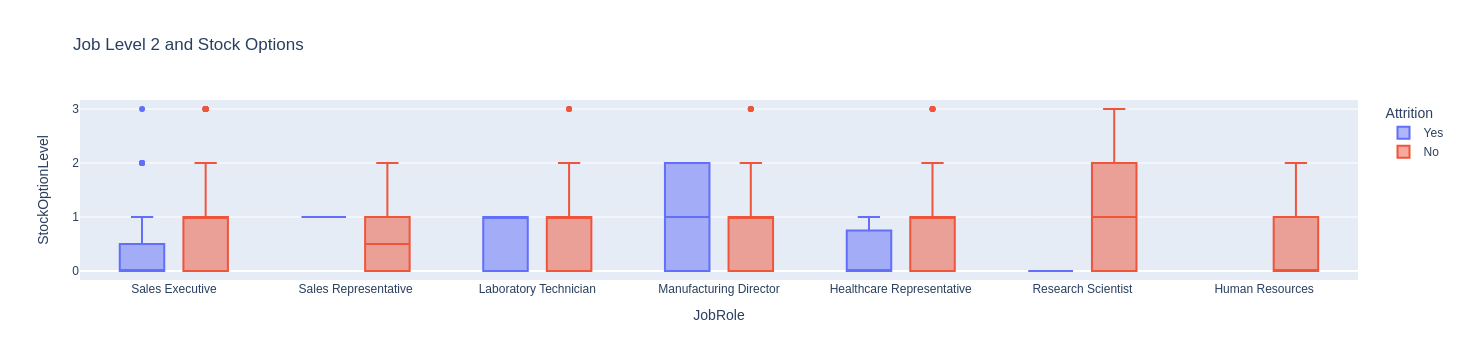

In [82]:
fig = px.box(joblevel2, x="JobRole", y="StockOptionLevel", color="Attrition", title= "Job Level 2 and Stock Options")
fig.show()

Even though those with Job Level 2 have nearly the same median monthly income, it turns out that for all the different Job Roles in this level, employees here with attrition have a lower median stock option level compared to those not attiring.

In [83]:
joblevel4= employee.loc[employee["JobLevel"]==4]

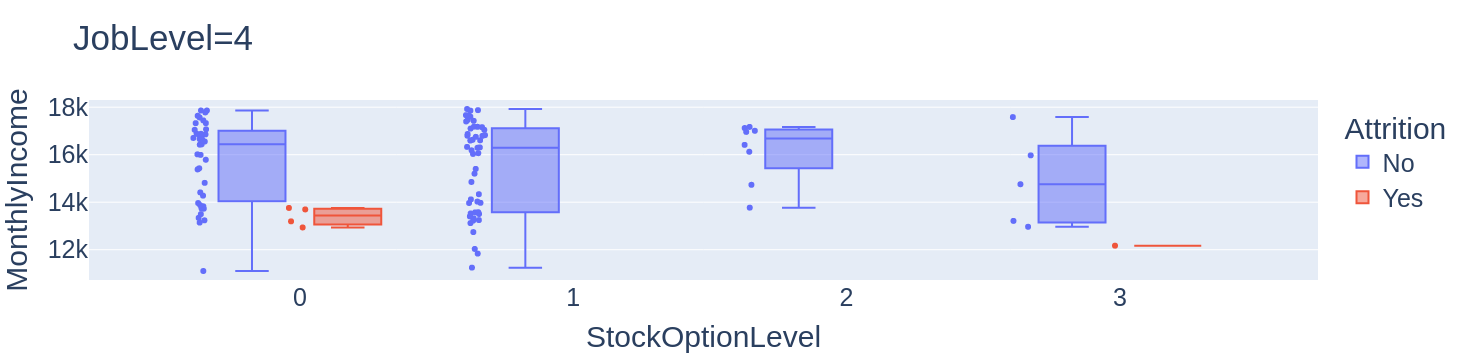

In [84]:
fig = px.box(joblevel4, x="StockOptionLevel", y="MonthlyIncome", points='all', color="Attrition", title= "JobLevel=4", width=500)
fig.show()

Possible reason for low attrition in Job Level 4: <br>
Even though there is a huge gap in median monthly income, most of the employees there have a high monthly income that may compensate for a lower stock option level. The red, box for those with attrition have no stocks and  a much lower monthly income compared to the rest.

### 6. Attrition and Age

<AxesSubplot: xlabel='Attrition', ylabel='Age'>

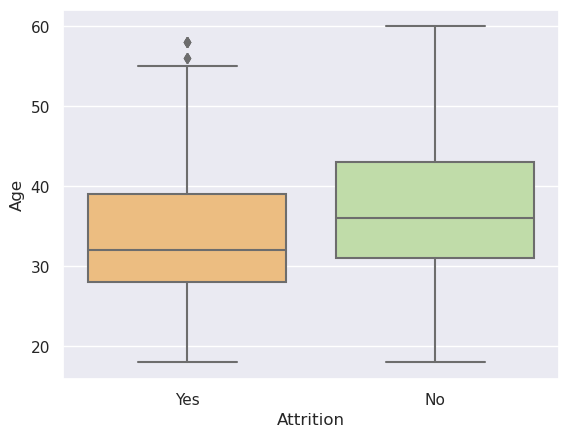

In [85]:
sb.boxplot(x = "Attrition", y = "Age", data = employee, palette='Spectral')

From the correlation plot earlier, the **correlation** with age is also **negative**. <br>
There are more **younger** people with **attrition**, meaning that retirement may not be a big influence to attirement. <br>
Younger employees may attire to explore better job opportunities until they find a company they are looking for.

### 7. Attrition and OverTime
##### using a Classification Decision Tree

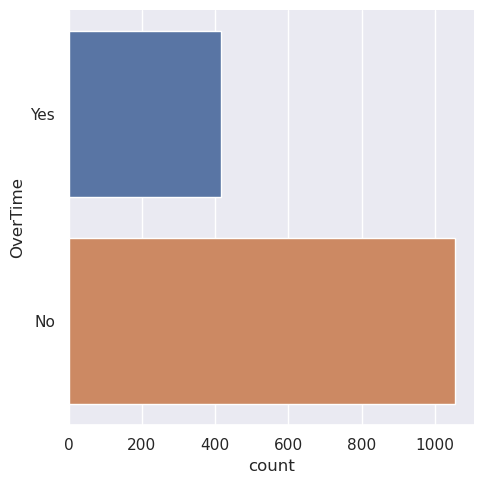

In [86]:
sb.catplot(y = 'OverTime', data = employee, kind = "count", height = 5)

In [87]:
no= final[final["OverTime"]==0]
yes= final[final["OverTime"]==1]
from sklearn.utils import resample

dataN_upsample= resample(yes, n_samples= no.shape[0])
data_upsample= pd.concat([no, dataN_upsample])

data_upsample.shape

(2108, 51)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5945604048070842

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6166982922201139



<AxesSubplot: >

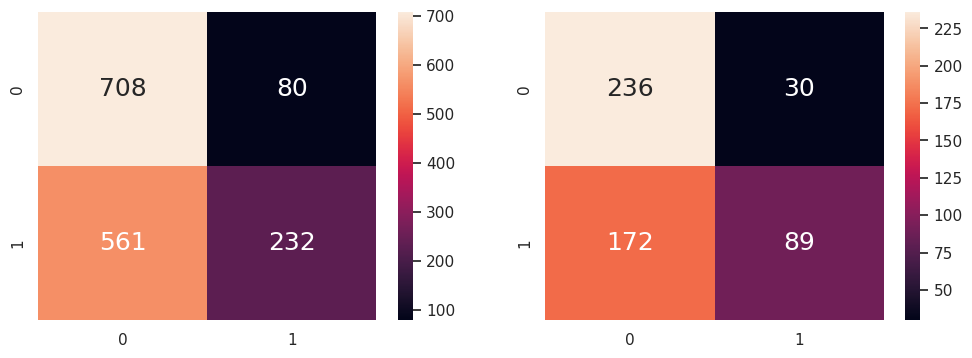

In [88]:
y = pd.DataFrame(data_upsample['OverTime'])
X = pd.DataFrame(data_upsample.drop(columns=['OverTime']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 1)


dectree = DecisionTreeClassifier(max_depth = 1)  
dectree.fit(X_train, y_train)                   

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [89]:
param_grid= {'n_estimators': np.arange(100, 250, 50), 'max_depth': np.arange(2,8)}

rforest = RandomForestClassifier()       

CV_rfr= GridSearchCV(estimator= rforest, param_grid= param_grid)
CV_rfr.fit(X_train, y_train.OverTime.ravel())

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'n_estimators': array([100, 150, 200])})

In [90]:
CV_rfr.best_params_

{'max_depth': 7, 'n_estimators': 200}

In [91]:
rforest = RandomForestClassifier(n_estimators = 200, max_depth = 7)       
rforest.fit(X_train, y_train.OverTime.ravel()) 

RandomForestClassifier(max_depth=7, n_estimators=200)

Train Data
Accuracy  :	 0.9475015812776724

TPR Train :	 0.9394703656998739
TNR Train :	 0.9555837563451777

FPR Train :	 0.044416243654822336
FNR Train :	 0.0605296343001261


<AxesSubplot: >

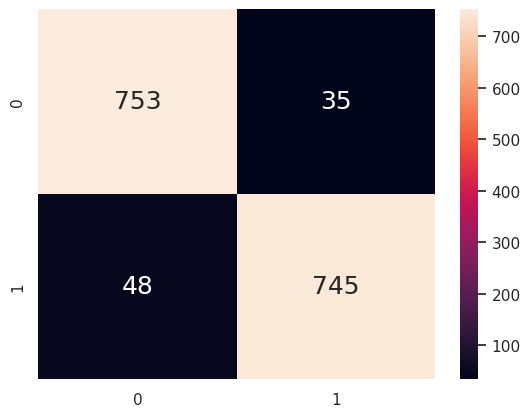

In [92]:
y_train_pred = rforest.predict(X_train)

print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18})

In [93]:
importances = rforest.feature_importances_
std = np.std([tree.feature_importances_ for tree in rforest.estimators_], axis=0)

In [94]:
importance=pd.DataFrame()
importance['Predictors']=X.columns
importance['Importance']=std

In [95]:
importance

Predictors  Importance
0                                 Age    0.028388
1                           DailyRate    0.042372
2                    DistanceFromHome    0.032229
3                          HourlyRate    0.037054
4                       MonthlyIncome    0.044343
5                         MonthlyRate    0.039658
6                  NumCompaniesWorked    0.022286
7                   PercentSalaryHike    0.026607
8                   TotalWorkingYears    0.026435
9               TrainingTimesLastYear    0.029057
10                     YearsAtCompany    0.025276
11                 YearsInCurrentRole    0.022825
12            YearsSinceLastPromotion    0.021645
13               YearsWithCurrManager    0.020278
14                          Attrition    0.061386
15                             Gender    0.016496
16                             Over18    0.004382
17                          Education    0.018965
18            EnvironmentSatisfaction    0.022348
19                     JobInvolvement    0.018563
20                    JobSatisfaction    0.018556
21                  PerformanceRating    0.007457
22           RelationshipSatisfaction    0.022648
23                    WorkLifeBalance    0.018836
24                           JobLevel    0.018283
25                   StockOptionLevel    0.016383
26          BusinessTravel_Non-Travel    0.015019
27   BusinessTravel_Travel_Frequently    0.009178
28       BusinessTravel_Travel_Rarely    0.009932
29         Department_Human Resources    0.004652
30  Department_Research & Development    0.009392
31                   Department_Sales    0.007767
32     EducationField_Human Resources    0.004957
33       EducationField_Life Sciences    0.010997
34           EducationField_Marketing    0.007305
35             EducationField_Medical    0.008861
36               EducationField_Other    0.008631
37    EducationField_Technical Degree    0.010932
38  JobRole_Healthcare Representative    0.013682
39            JobRole_Human Resources    0.004412
40      JobRole_Laboratory Technician    0.015803
41                    JobRole_Manager    0.005977
42     JobRole_Manufacturing Director    0.008081
43          JobRole_Research Director    0.006450
44         JobRole_Research Scientist    0.013653
45            JobRole_Sales Executive    0.007895
46       JobRole_Sales Representative    0.007163
47             MaritalStatus_Divorced    0.009802
48              MaritalStatus_Married    0.009739
49               MaritalStatus_Single    0.015380

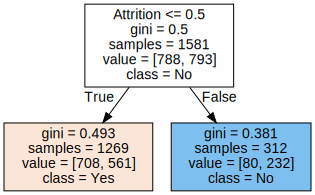

In [96]:
treedot= export_graphviz(dectree, feature_names= X_train.columns, out_file=None, filled=True, class_names=["Yes","No"])

import graphviz                  
graphviz.Source(treedot)                 

<AxesSubplot: xlabel='OverTime', ylabel='MonthlyIncome'>

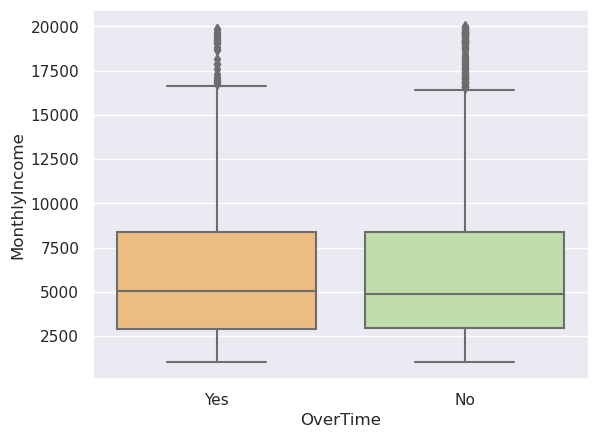

In [97]:
sb.boxplot(data=employee,y= 'MonthlyIncome',x="OverTime", palette= "Spectral")

Here we can observe that attrition is the most important variable, its importance value factor is even significantly higher than all the other variables. <br>
As we have found from the previous tree, overtime and attrition have a strong correlation with one another. <br>
From the correlation plot earlier, the **correlation** with overtime is **positive**. <br>
Employees **with attrition** are more likely those that **do not have overtime**. <br>
Possible reasons for this interesting finding may be that some employees want to work overtime to earn more but they don't see much of a difference in monthly income if they do. Or they want to work overtime but are not given the opportunity to as there are only limited allowance. Hence, employees may leave the company to look for other companies which allows them to work overtime and can earn much more by doing so.

/tmp/ipykernel_1493/2318611064.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




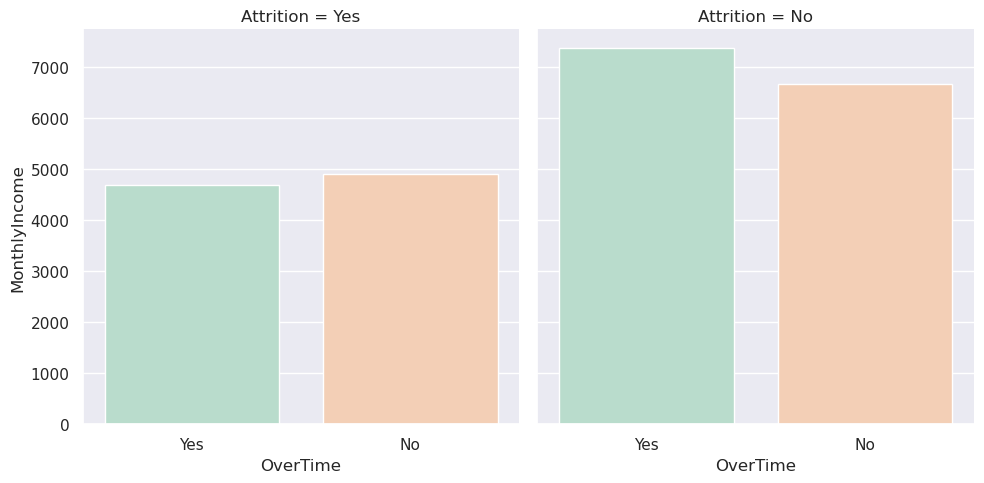

In [98]:
sb.catplot(x="OverTime", y="MonthlyIncome", col="Attrition", data=employee, kind="bar", palette= "Pastel2", ci=None, aspect= 1)

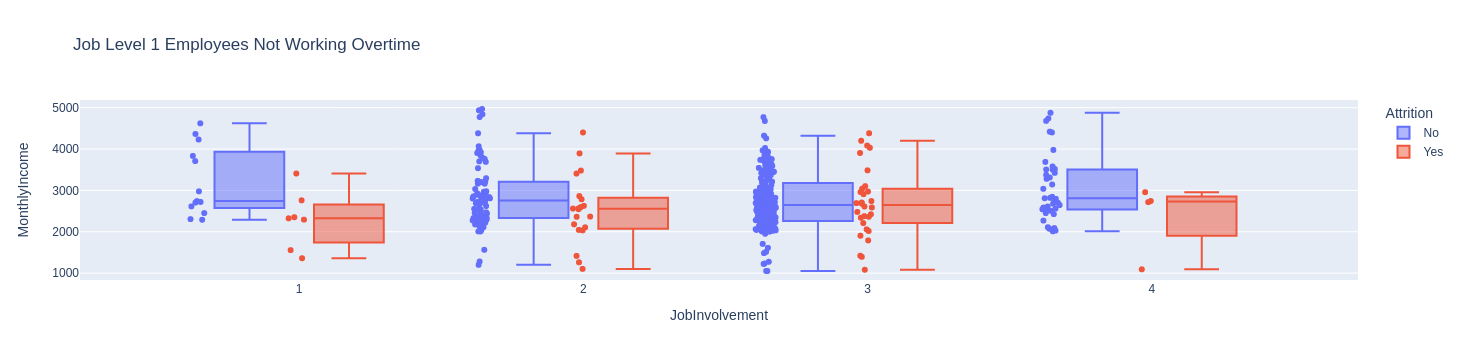

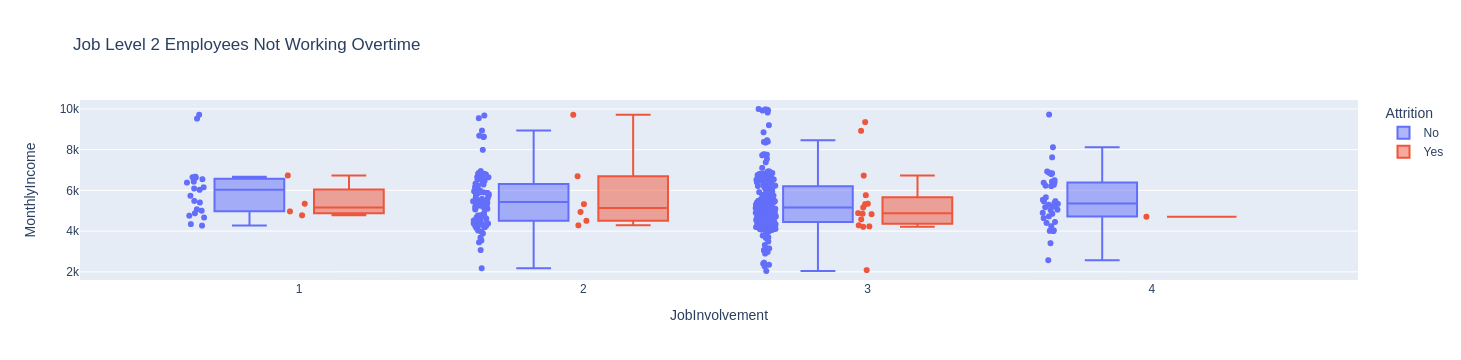

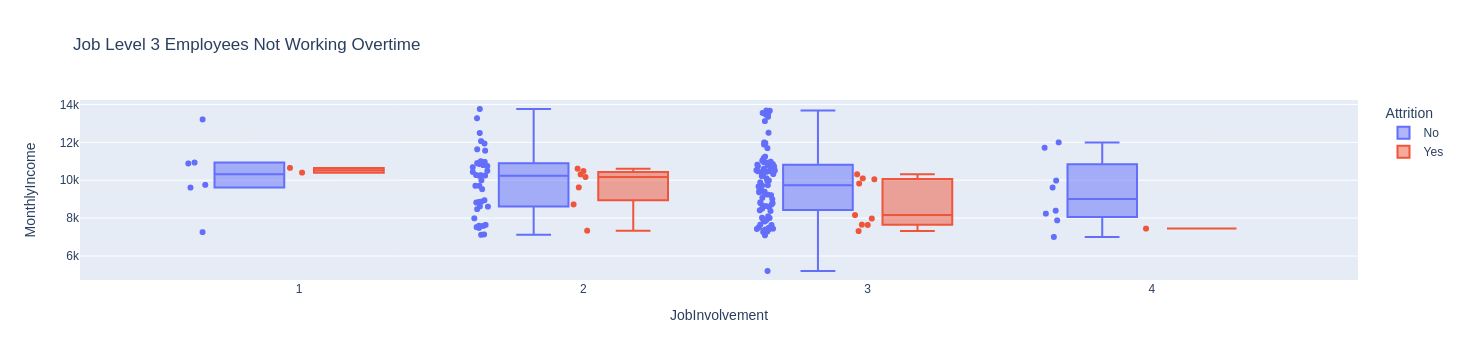

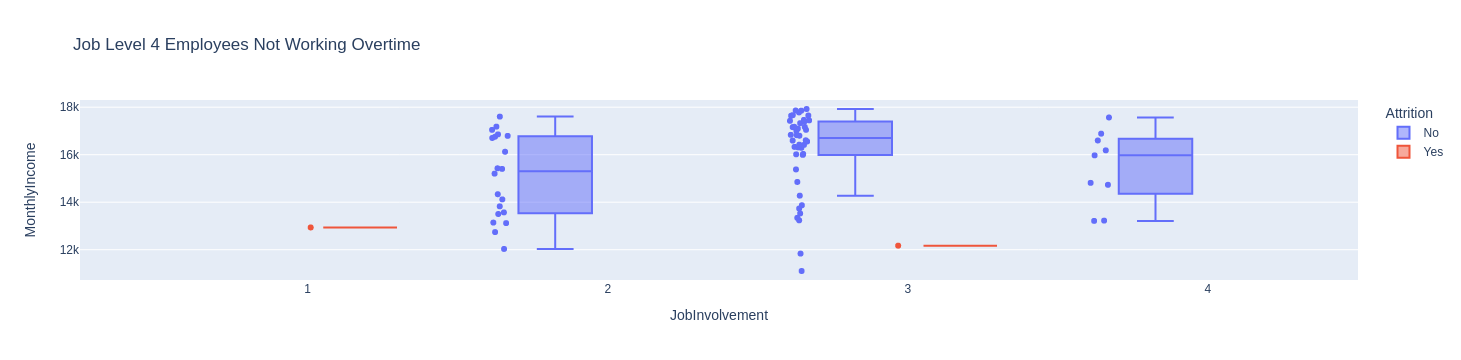

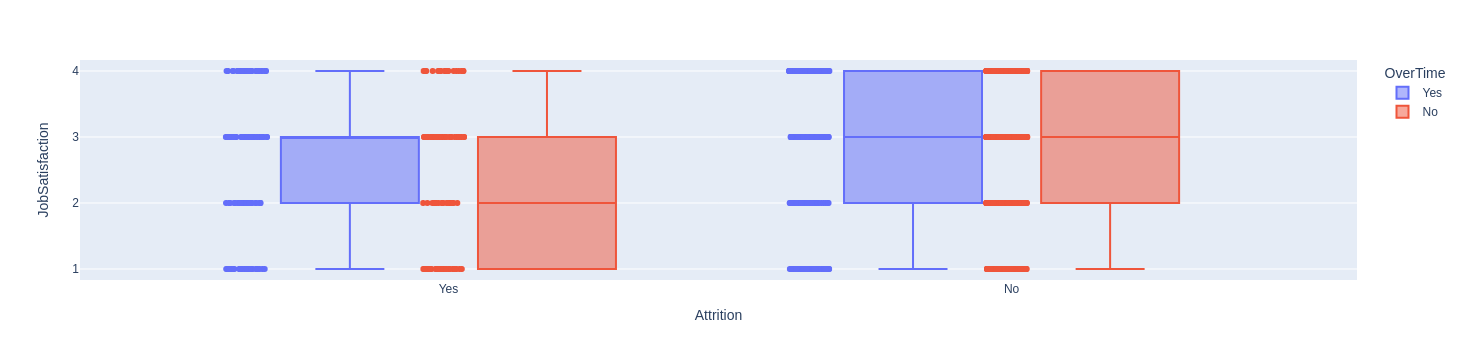

In [99]:
import plotly.express as px
noovertime= employee[employee["OverTime"]=="No"]

noovertime_level1 = noovertime[noovertime["JobLevel"]==1]
fig = px.box(noovertime_level1, x="JobInvolvement", y="MonthlyIncome", points='all', color="Attrition", title= "Job Level 1 Employees Not Working Overtime")
fig.show()

noovertime_level2 = noovertime[noovertime["JobLevel"]==2]
fig = px.box(noovertime_level2, x="JobInvolvement", y="MonthlyIncome", points='all', color="Attrition", title= "Job Level 2 Employees Not Working Overtime")
fig.show()

noovertime_level3 = noovertime[noovertime["JobLevel"]==3]
fig = px.box(noovertime_level3, x="JobInvolvement", y="MonthlyIncome", points='all', color="Attrition", title= "Job Level 3 Employees Not Working Overtime")
fig.show()

noovertime_level4 = noovertime[noovertime["JobLevel"]==4]
fig = px.box(noovertime_level4, x="JobInvolvement", y="MonthlyIncome", points='all', color="Attrition", title= "Job Level 4 Employees Not Working Overtime")
fig.show()

fig = px.box(employee, x="Attrition", y="JobSatisfaction", points='all', color="OverTime")
fig.show()
ff

Employees without attrition, whether working overtime or not have a median job satisfaction at 3. <br>
<br>
However, those with attrition, have a different job satisfaction depending on whether or not they work overtime. <br>
Attiring employees not working overtime are actually less satisfied with their job than those working overtime. <br>
<br>
Reasons for dissatisfaction are as follows: <br>
In the box plot, we can see how job level 1 employees with attrition have a much lower median monthly income for every job involvement value.<br>
<br>
This could mean that attiring employees feel unfair because they are being paid less than people in the same job level who are also not working overtime and with the same job involvement.
<br>
This trend is observed for all the job levels.

### 8. Attrition and StockOptionLevel
##### using a Classification Decision Tree

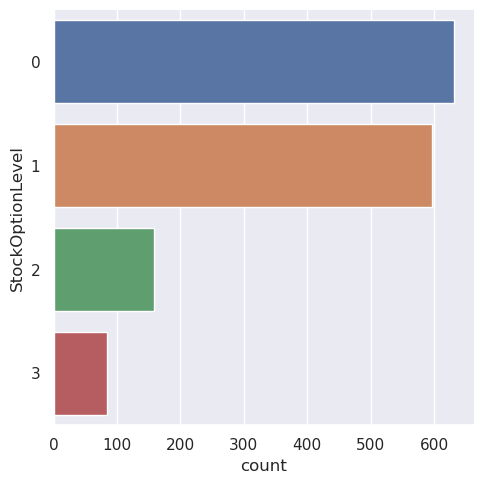

In [100]:
sb.catplot(y = 'StockOptionLevel', data = employee, kind = "count", height = 5)

In [101]:
stock= pd.get_dummies(final.StockOptionLevel, prefix= "Stock")

In [102]:
stock.head()

Stock_0  Stock_1  Stock_2  Stock_3
0        1        0        0        0
1        0        1        0        0
2        1        0        0        0
3        1        0        0        0
4        0        1        0        0

In [103]:
final2= final.copy()
final2= pd.concat([final2, stock], axis=1)
del final2["StockOptionLevel"]
final2.head()

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  MonthlyRate  \
0   41       1102                 1          94           5993        19479   
1   49        279                 8          61           5130        24907   
2   37       1373                 2          92           2090         2396   
3   33       1392                 3          56           2909        23159   
4   27        591                 2          40           3468        16632   

   NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0                   8                 11                  8   
1                   1                 23                 10   
2                   6                 15                  7   
3                   1                 11                  8   
4                   9                 12                  6   

   TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0                      0               6                   4   
1                      3              10                   7   
2                      3               0                   0   
3                      3               8                   7   
4                      3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  Attrition  Gender  Over18  \
0                        0                     5          1       0       1   
1                        1                     7          0       1       1   
2                        0                     0          1       1       1   
3                        3                     0          0       0       1   
4                        2                     2          0       1       1   

   OverTime  Education  EnvironmentSatisfaction  JobInvolvement  \
0         1          2                        2               3   
1         0          1                        3               2   
2         1          2                        4               2   
3         1          4                        4               3   
4         0          1                        1               3   

   JobSatisfaction  PerformanceRating  RelationshipSatisfaction  \
0                4                  0                         1   
1                2                  1                         4   
2                3                  0                         2   
3                3                  0                         3   
4                2                  0                         4   

   WorkLifeBalance  JobLevel  BusinessTravel_Non-Travel  \
0                1         2                        0.0   
1                3         2                        0.0   
2                3         1                        0.0   
3                3         1                        0.0   
4                3         1                        0.0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                               0.0                           1.0   
1                               1.0                           0.0   
2                               0.0                           1.0   
3                               1.0                           0.0   
4                               0.0                           1.0   

   Department_Human Resources  Department_Research & Development  \
0                         0.0                                0.0   
1                         0.0                                1.0   
2                         0.0                                1.0   
3                         0.0                                1.0   
4                         0.0                                1.0   

   Department_Sales  EducationField_Human Resources  \
0               1.0                             0.0   
1               0.0                             0.0   
2               0.0                             0.0   
3               0.0                             0.0   
4               0.0          

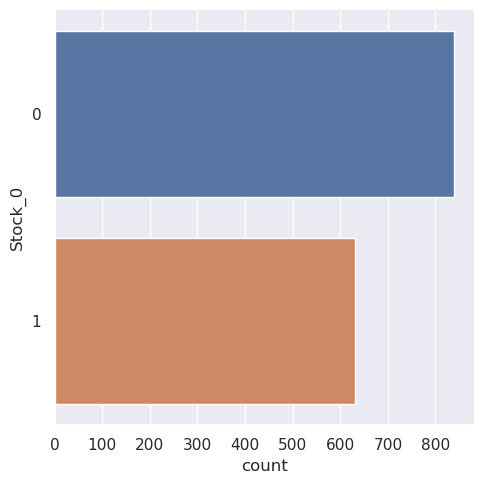

In [104]:
sb.catplot(y = 'Stock_0', data = final2, kind = "count", height = 5)

In [105]:
withstock= final2[final2["Stock_0"]==0]
nostock= final2[final2["Stock_0"]==1]
from sklearn.utils import resample

dataN_upsample= resample(withstock, n_samples= nostock.shape[0])
data_upsample= pd.concat([nostock, dataN_upsample])

data_upsample.shape

(1262, 54)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5676532769556025

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5949367088607594



<AxesSubplot: >

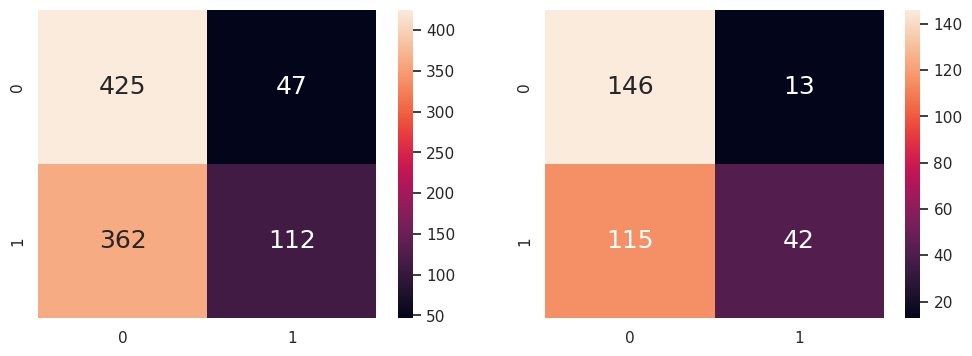

In [106]:
y = pd.DataFrame(data_upsample['Stock_0'])
X = pd.DataFrame(data_upsample['Attrition'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 1)


dectree = DecisionTreeClassifier(max_depth = 2)  
dectree.fit(X_train, y_train)                   

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

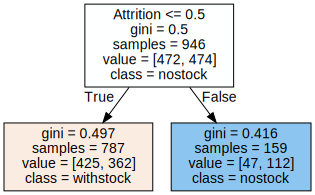

In [107]:
treedot= export_graphviz(dectree,
          feature_names= X_train.columns,
          out_file=None,
          filled=True,
          class_names=["withstock","nostock"])

import graphviz                  
graphviz.Source(treedot)                 

Employees **with attrition** are most likely those **without any stock option**. <br>
Stock options are usually used to reward well-performing employees or as an incentive for employees to stay in the company and perform better. <br>
We predict that employees without stock option may feel unappreciated when they are not issued the stock option and may look for other companies that will reward them. Or, if they were issued but they refused to, maybe they think that other companies may have offered them  a job with better stock options.

In [108]:
employee["StockOptionLevel"].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

/tmp/ipykernel_1493/57677876.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




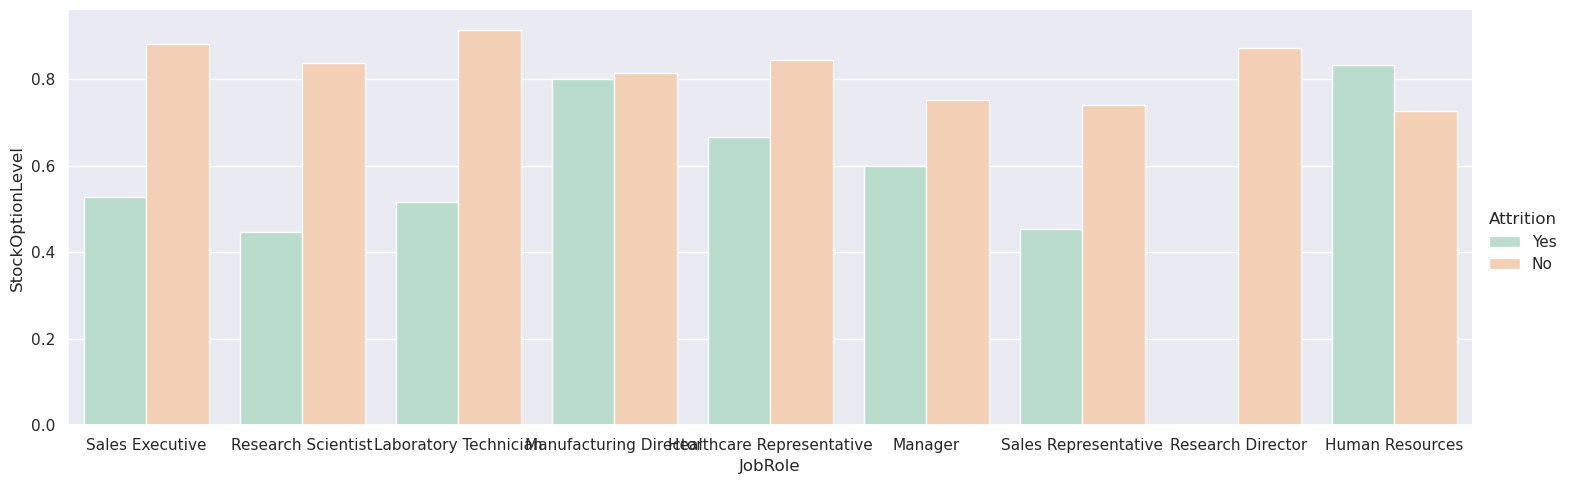

In [109]:
sb.catplot(x="JobRole", y="StockOptionLevel", hue= 'Attrition', data=employee, kind="bar", palette= "Pastel2", ci=None, aspect= 3)

For every job role except Human Resources, there seems to be a trend where employees with attrition are those that have a lower stock level compared to those without attrition. <br>
Once again, employees might be attiring because they have a lower stock option level than other employees of the same role.

### 9. Attrition and Years in Current Role

<AxesSubplot: xlabel='Attrition', ylabel='YearsInCurrentRole'>

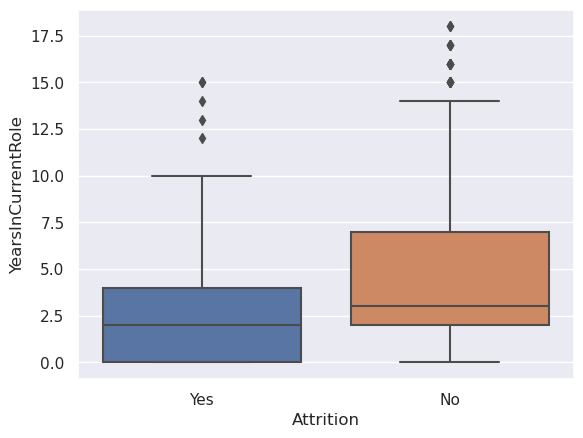

In [110]:
sb.boxplot(x = "Attrition", y = "YearsInCurrentRole", data = employee)

In compilation with years with current manager, total working years, and years at company, years in current role also proves how employees with **shorter working years are more likely to attire**. 

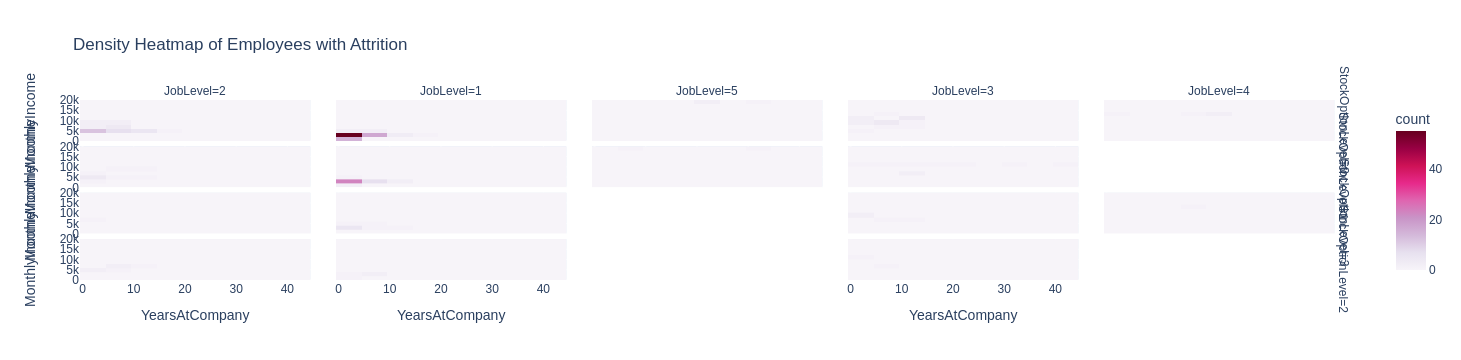

In [111]:
fig = px.density_heatmap(att, x="YearsAtCompany", y="MonthlyIncome", facet_col="JobLevel", facet_row= "StockOptionLevel", color_continuous_scale="purd", title="Density Heatmap of Employees with Attrition")
fig.show()

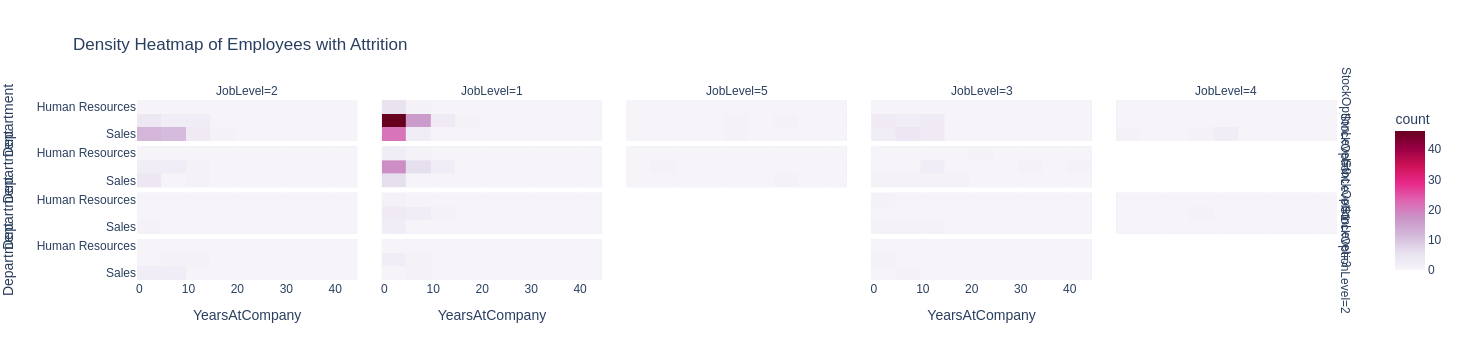

In [112]:
fig = px.density_heatmap(att, x="YearsAtCompany", y="Department", facet_col="JobLevel", facet_row= "StockOptionLevel", color_continuous_scale="purd", title="Density Heatmap of Employees with Attrition")
fig.show()

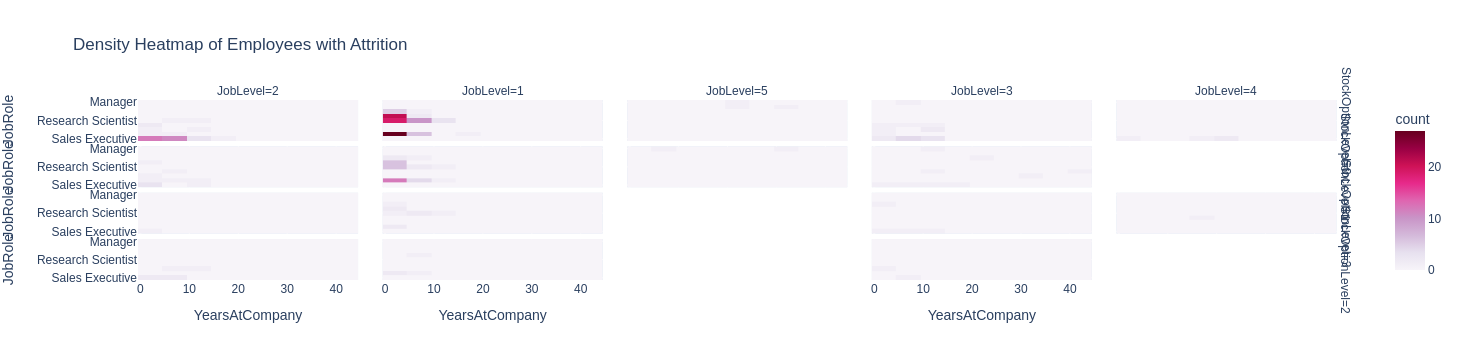

In [113]:
fig = px.density_heatmap(att, x="YearsAtCompany", y="JobRole", facet_col="JobLevel", facet_row= "StockOptionLevel", color_continuous_scale="purd", title="Density Heatmap of Employees with Attrition")
fig.show()